# Library

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
import sklearn
print(sklearn.__version__)

1.2.0


In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.metrics import silhouette_score

In [5]:
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

# DATA

In [6]:
X = pd.read_csv("~/DAVID_WGS/binning/DASTool/TABLES/METABOLISM_copy_number-enzyme_hits-MATRIX_17&22.txt", 
                             header =  0, sep = "\t",index_col = 0)

In [7]:
X

V350181262_110_43  V350181262_110_51  V350181262_110_52  \
enzyme                                                            
K00003                1.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_62  V350181262_110_74  V350181262_110_12  \
enzyme                                                            
K00003                1.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                2.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_14  V350181262_110_19  V350181262_110_23  \
enzyme                                                            
K00003                1.0                1.0                0.0   
K00004                0.0                0.0                0.0   
K00005                2.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_3  ...  V350181262_134_3  V350181262_134_30  \
enzyme                    ...                                        
K00003               1.0  ...               1.0                0.0   
K00004               0.0  ...               0.0                0.0   
K00005               0.0  ...               0.0                0.0   
K00007               0.0  ...               0.0                0.0   
K00008               0.0  ...               0.0                0.0   
...                  ...  ...               ...                ...   
K25659               0.0  ...               0.0                0.0   
K25775               0.0  ...               0.0                0.0   
K25806               0.0  ...               0.0                0.0   
K26061               0.0  ...               0.0                0.0   
K26284               0.0  ...               0.0                0.0   

        V350181262_134_31  V350181262_134_32  V350181262_134_35  \
enzyme                                                            
K00003                0.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...         

In [10]:
meta = pd.read_csv('./DATA/mag_description.csv',sep=',',index_col=8)
meta

sample   Kingdom              Phylum  \
bin_name                                                           
V350166995_161.26   V350166995_161  Bacteria        Firmicutes_A   
V350166995_161.49   V350166995_161  Bacteria        Firmicutes_A   
V350166995_161.67   V350166995_161  Bacteria        Firmicutes_A   
V350166995_161.70   V350166995_161  Bacteria        Firmicutes_A   
V350166995_161.75   V350166995_161  Bacteria  Desulfobacterota_I   
...                            ...       ...                 ...   
V350181323_9_2        V350181323_9  Bacteria        Firmicutes_A   
V350181323_9_4        V350181323_9  Bacteria        Firmicutes_A   
V350181323_9_5        V350181323_9  Bacteria        Bacteroidota   
V350181323_9_6_sub    V350181323_9  Bacteria        Bacteroidota   
V350181323_9_8        V350181323_9  Bacteria      Proteobacteria   

                                  Class                 Order  \
bin_name                                                        
V350166995_161.26            Clostridia  Peptostreptococcales   
V350166995_161.49            Clostridia        Lachnospirales   
V350166995_161.67            Clostridia       Oscillospirales   
V350166995_161.70            Clostridia       Oscillospirales   
V350166995_161.75      Desulfovibrionia    Desulfovibrionales   
...                                 ...                   ...   
V350181323_9_2               Clostridia       Oscillospirales   
V350181323_9_4               Clostridia        Lachnospirales   
V350181323_9_5              Bacteroidia         Bacteroidales   
V350181323_9_6_sub          Bacteroidia         Bacteroidales   
V350181323_9_8      Gammaproteobacteria      Enterobacterales   

                                 Family             Genus  \
bin_name                                                    
V350166995_161.26      Anaerovoracaceae          Fimisoma   
V350166995_161.49       Anaerotignaceae      Anaerotignum   
V350166995_161.67       Ruminococcaceae  Faecalibacterium   
V350166995_161.70      Oscillospiraceae         Faecousia   
V350166995_161.75   Desulfovibrionaceae         Bilophila   
...                                 ...               ...   
V350181323_9_2       Acutalibacteraceae    Ruminococcus_E   
V350181323_9_4          Lachnospiraceae       Coprococcus   
V350181323_9_5          Barnesiellaceae       Barnesiella   
V350181323_9_6_sub        Rikenellaceae         Alistipes   
V350181323_9_8       Enterobacteriaceae       Escherichia   

                                           Species   ID_KYH  ID_Dima  ...  \
bin_name                                                              ...   
V350166995_161.26             Fimisoma sp002320005  1132808      1.0  ...   
V350166995_161.49           Anaerotignum faecicola  1132808      1.0  ...   
V350166995_161.67   Faecalibacterium prausnitzii_D  1132808      1.0  ...   
V350166995_161.70            Faecousia sp000435995  1132808      1.0  ...   
V350166995_161.75            Bilophila wadsworthia  1132808      1.0  ...   
...                                            ...      ...      ...  ...   
V350181323_9_2             Ruminococcus_E bromii_B  1164738      1.0  ...   
V350181323_9_4             Coprococcus sp000154245  1164738      1.0  ...   
V350181323_9_5        Barnesiella intestinihominis  1164738      1.0  ...   
V350181323_9_6_sub            Alistipes putredinis  1164738      1.0  ...   
V350181323_9_8                    Escherichia coli  1164738      1.0  ...   

                       ID_ESSE age_at_baseline weight_kg tuberculosis  \
bin_name                                                                
V350166995_161.26   11144301.0       67.000000      93.0           no   
V350166995_161.49   11144301.0       67.000000      93.0           no   
V350166995_161.67   11144301.0       67.000000      93.0           no   
V350166995_161.70   11144301.0       67.000000      93.0           no   
V350166995_161.75   11144301.0       67.000000      93.0       

In [11]:
def rename_index(index, year):
    if year == 2022:
        return index.replace('.', '_s')
    elif year == 2017:
        return index.replace('.', '_')
    else:
        return index

In [12]:
meta.index = [
    rename_index(index, year) for index, year in zip(meta.index, meta['YEAR'])
]

In [13]:
meta

sample   Kingdom              Phylum  \
V350166995_161_s26  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s49  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s67  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s70  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s75  V350166995_161  Bacteria  Desulfobacterota_I   
...                            ...       ...                 ...   
V350181323_9_2        V350181323_9  Bacteria        Firmicutes_A   
V350181323_9_4        V350181323_9  Bacteria        Firmicutes_A   
V350181323_9_5        V350181323_9  Bacteria        Bacteroidota   
V350181323_9_6_sub    V350181323_9  Bacteria        Bacteroidota   
V350181323_9_8        V350181323_9  Bacteria      Proteobacteria   

                                  Class                 Order  \
V350166995_161_s26           Clostridia  Peptostreptococcales   
V350166995_161_s49           Clostridia        Lachnospirales   
V350166995_161_s67           Clostridia       Oscillospirales   
V350166995_161_s70           Clostridia       Oscillospirales   
V350166995_161_s75     Desulfovibrionia    Desulfovibrionales   
...                                 ...                   ...   
V350181323_9_2               Clostridia       Oscillospirales   
V350181323_9_4               Clostridia        Lachnospirales   
V350181323_9_5              Bacteroidia         Bacteroidales   
V350181323_9_6_sub          Bacteroidia         Bacteroidales   
V350181323_9_8      Gammaproteobacteria      Enterobacterales   

                                 Family             Genus  \
V350166995_161_s26     Anaerovoracaceae          Fimisoma   
V350166995_161_s49      Anaerotignaceae      Anaerotignum   
V350166995_161_s67      Ruminococcaceae  Faecalibacterium   
V350166995_161_s70     Oscillospiraceae         Faecousia   
V350166995_161_s75  Desulfovibrionaceae         Bilophila   
...                                 ...               ...   
V350181323_9_2       Acutalibacteraceae    Ruminococcus_E   
V350181323_9_4          Lachnospiraceae       Coprococcus   
V350181323_9_5          Barnesiellaceae       Barnesiella   
V350181323_9_6_sub        Rikenellaceae         Alistipes   
V350181323_9_8       Enterobacteriaceae       Escherichia   

                                           Species   ID_KYH  ID_Dima  ...  \
V350166995_161_s26            Fimisoma sp002320005  1132808      1.0  ...   
V350166995_161_s49          Anaerotignum faecicola  1132808      1.0  ...   
V350166995_161_s67  Faecalibacterium prausnitzii_D  1132808      1.0  ...   
V350166995_161_s70           Faecousia sp000435995  1132808      1.0  ...   
V350166995_161_s75           Bilophila wadsworthia  1132808      1.0  ...   
...                                            ...      ...      ...  ...   
V350181323_9_2             Ruminococcus_E bromii_B  1164738      1.0  ...   
V350181323_9_4             Coprococcus sp000154245  1164738      1.0  ...   
V350181323_9_5        Barnesiella intestinihominis  1164738      1.0  ...   
V350181323_9_6_sub            Alistipes putredinis  1164738      1.0  ...   
V350181323_9_8                    Escherichia coli  1164738      1.0  ...   

                       ID_ESSE age_at_baseline weight_kg tuberculosis  \
V350166995_161_s26  11144301.0       67.000000      93.0           no   
V350166995_161_s49  11144301.0       67.000000      93.0           no   
V350166995_161_s67  11144301.0       67.000000      93.0           no   
V350166995_161_s70  11144301.0       67.000000      93.0           no   
V350166995_161_s75  11144301.0       67.000000      93.0           no   
...                        ...             ...       ...          ...   
V350181323_9_2             NaN       67.367556      69.0          NaN   
V350181323_9_4             NaN       67.367556      69.0          NaN   
V350181323_9_5             NaN       67.367556      69.0          NaN   
V350181323_9_6_sub         NaN       67.36

In [14]:
sample_unique_without_repeats =  ["V350166995_161", "V350166995_162", "V350166995_163", "V350166995_164", "V350166995_165", "V350166995_166", "V350166995_167", "V350166995_168",
 "V350166995_169", "V350166995_170", "V350166995_171", "V350166995_172", "V350166995_173", "V350166995_174", "V350166995_175", "V350166995_176",
 "V350166995_177", "V350166995_178", "V350166995_179", "V350166995_180", "V350166995_181", "V350166995_182", "V350166995_183", "V350166995_184",
 "V350166995_185", "V350166995_186", "V350166995_187", "V350166995_188", "V350166995_189", "V350166995_190", "V350166995_191", "V350166995_192",
 "V350166995_57" , "V350166995_58" , "V350166995_59" , "V350166995_60" , "V350166995_61" , "V350166995_62" , "V350166995_63" , "V350166995_64" ,
 "V350166995_65" , "V350166995_66" , "V350166995_67" , "V350166995_68" , "V350166995_69" , "V350166995_70" , "V350166995_71" , "V350166995_72" ,
 "V350166995_81" , "V350166995_82" , "V350166995_83" , "V350166995_84" , "V350166995_85" , "V350166995_86" , "V350166995_87" , "V350166995_88" ,
 "V350166995_89" , "V350166995_90" , "V350166995_91" , "V350166995_92" , "V350166995_93" , "V350166995_94" , "V350166995_95" , "V350166995_96" ,
 "V350174473_1"  , "V350174473_10" , "V350174473_11" , "V350174473_12" , "V350174473_13" , "V350174473_14" , "V350174473_15" , "V350174473_16" ,
 "V350174473_17" , "V350174473_18" , "V350174473_19" , "V350174473_2"  , "V350174473_21" , "V350174473_22" , "V350174473_23" , "V350174473_24" ,
 "V350174473_25" , "V350174473_26" , "V350174473_27" , "V350174473_28" , "V350174473_29" , "V350174473_3"  , "V350174473_30" , "V350174473_31" ,
 "V350174473_32" , "V350174473_33" , "V350174473_34" , "V350174473_35" , "V350174473_36" , "V350174473_37" , "V350174473_38" , "V350174473_39" ,
 "V350174473_4"  , "V350174473_40" , "V350174473_41" , "V350174473_42" , "V350174473_44" , "V350174473_45" , "V350174473_46" , "V350174473_47" ,
 "V350174473_48" , "V350174473_49" , "V350174473_5"  , "V350174473_50" , "V350174473_51" , "V350174473_52" , "V350174473_53" , "V350174473_54" ,
 "V350174473_55" , "V350174473_56" , "V350174473_57" , "V350174473_58" , "V350174473_59" , "V350174473_6"  , "V350174473_60" , "V350174473_61" ,
 "V350174473_62" , "V350174473_63" , "V350174473_64" , "V350174473_65" , "V350174473_66" , "V350174473_67" , "V350174473_68" , "V350174473_69" ,
 "V350174473_7"  , "V350174473_70" , "V350174473_71" , "V350174473_72" , "V350174473_8"  , "V350174473_9"  , "V350181201_10" , "V350181201_11" ,
 "V350181201_12" , "V350181201_13" , "V350181201_14" , "V350181201_15" , "V350181201_16" , "V350181201_17" , "V350181201_18" , "V350181201_19" ,
 "V350181201_20" , "V350181201_21" , "V350181201_22" , "V350181201_23" , "V350181201_24" , "V350181201_25" , "V350181201_29" , "V350181201_30" ,
 "V350181201_31" , "V350181201_32" , "V350181201_33" , "V350181201_34" , "V350181201_35" , "V350181201_36" , "V350181201_37" , "V350181201_38" ,
 "V350181201_39" , "V350181201_40" , "V350181201_41" , "V350181201_42" , "V350181201_43" , "V350181201_44" , "V350181201_45" , "V350181201_9"  ,
 "V350181262_100", "V350181262_101", "V350181262_102", "V350181262_103", "V350181262_104", "V350181262_105", "V350181262_106", "V350181262_107",
 "V350181262_108", "V350181262_109", "V350181262_110", "V350181262_111", "V350181262_112", "V350181262_113", "V350181262_114", "V350181262_115",
 "V350181262_116", "V350181262_117", "V350181262_118", "V350181262_119", "V350181262_120", "V350181262_121", "V350181262_122", "V350181262_124",
 "V350181262_126", "V350181262_127", "V350181262_128", "V350181262_129", "V350181262_130", "V350181262_131", "V350181262_132", "V350181262_133",
 "V350181262_134", "V350181262_135", "V350181262_136", "V350181262_137", "V350181262_138", "V350181262_139", "V350181262_140", "V350181262_141",
 "V350181262_142", "V350181262_143", "V350181262_144", "V350181262_145", "V350181262_146", "V350181262_147", "V350181262_148", "V350181262_149",
 "V350181262_150", "V350181262_151", "V350181262_152", "V350181262_153", "V350181262_154", "V350181262_156", "V350181262_158", "V350181262_159",
 "V350181262_160", "V350181262_97" , "V350181262_98" , "V350181262_99" , "V350181321_100", "V350181321_101", "V350181321_102", "V350181321_103",
 "V350181321_104", "V350181321_105", "V350181321_106", "V350181321_107", "V350181321_108", "V350181321_109", "V350181321_110", "V350181321_111",
 "V350181321_112", "V350181321_113", "V350181321_114", "V350181321_115", "V350181321_116", "V350181321_118", "V350181321_119", "V350181321_120",
 "V350181321_121", "V350181321_122", "V350181321_123", "V350181321_124", "V350181321_125", "V350181321_126", "V350181321_129", "V350181321_130",
 "V350181321_131", "V350181321_132", "V350181321_133", "V350181321_134", "V350181321_135", "V350181321_136", "V350181321_137", "V350181321_138",
 "V350181321_139", "V350181321_140", "V350181321_141", "V350181321_142", "V350181321_143", "V350181321_144", "V350181321_145", "V350181321_147",
 "V350181321_148", "V350181321_149", "V350181321_152", "V350181321_153", "V350181321_154", "V350181321_155", "V350181321_156", "V350181321_157",
 "V350181321_158", "V350181321_159", "V350181321_160", "V350181321_97" , "V350181321_98" , "V350181321_99" , "V350181323_10" , "V350181323_11" ,
 "V350181323_12" , "V350181323_13" , "V350181323_14" , "V350181323_15" , "V350181323_16" , "V350181323_161", "V350181323_162", "V350181323_163",
 "V350181323_164", "V350181323_165", "V350181323_166", "V350181323_167", "V350181323_17" , "V350181323_18" , "V350181323_19" , "V350181323_20" ,
 "V350181323_22" , "V350181323_23" , "V350181323_24" , "V350181323_25" , "V350181323_26" , "V350181323_27" , "V350181323_28" , "V350181323_29" ,
 "V350181323_30" , "V350181323_31" , "V350181323_32" , "V350181323_33" , "V350181323_34" , "V350181323_35" , "V350181323_36" , "V350181323_37" ,
 "V350181323_38" , "V350181323_39" , "V350181323_40" , "V350181323_41" , "V350181323_42" , "V350181323_43" , "V350181323_44" , "V350181323_45" ,
 "V350181323_46" , "V350181323_47" , "V350181323_48" , "V350181323_49" , "V350181323_50" , "V350181323_51" , "V350181323_53" , "V350181323_54" ,
 "V350181323_55" , "V350181323_57" , "V350181323_58" , "V350181323_59" , "V350181323_60" , "V350181323_61" , "V350181323_62" , "V350181323_63" ,
 "V350181323_64" , "V350181323_9"]

In [15]:
meta = meta[meta['sample'].isin(sample_unique_without_repeats)]
meta

sample   Kingdom              Phylum  \
V350166995_161_s26  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s49  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s67  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s70  V350166995_161  Bacteria        Firmicutes_A   
V350166995_161_s75  V350166995_161  Bacteria  Desulfobacterota_I   
...                            ...       ...                 ...   
V350181323_9_2        V350181323_9  Bacteria        Firmicutes_A   
V350181323_9_4        V350181323_9  Bacteria        Firmicutes_A   
V350181323_9_5        V350181323_9  Bacteria        Bacteroidota   
V350181323_9_6_sub    V350181323_9  Bacteria        Bacteroidota   
V350181323_9_8        V350181323_9  Bacteria      Proteobacteria   

                                  Class                 Order  \
V350166995_161_s26           Clostridia  Peptostreptococcales   
V350166995_161_s49           Clostridia        Lachnospirales   
V350166995_161_s67           Clostridia       Oscillospirales   
V350166995_161_s70           Clostridia       Oscillospirales   
V350166995_161_s75     Desulfovibrionia    Desulfovibrionales   
...                                 ...                   ...   
V350181323_9_2               Clostridia       Oscillospirales   
V350181323_9_4               Clostridia        Lachnospirales   
V350181323_9_5              Bacteroidia         Bacteroidales   
V350181323_9_6_sub          Bacteroidia         Bacteroidales   
V350181323_9_8      Gammaproteobacteria      Enterobacterales   

                                 Family             Genus  \
V350166995_161_s26     Anaerovoracaceae          Fimisoma   
V350166995_161_s49      Anaerotignaceae      Anaerotignum   
V350166995_161_s67      Ruminococcaceae  Faecalibacterium   
V350166995_161_s70     Oscillospiraceae         Faecousia   
V350166995_161_s75  Desulfovibrionaceae         Bilophila   
...                                 ...               ...   
V350181323_9_2       Acutalibacteraceae    Ruminococcus_E   
V350181323_9_4          Lachnospiraceae       Coprococcus   
V350181323_9_5          Barnesiellaceae       Barnesiella   
V350181323_9_6_sub        Rikenellaceae         Alistipes   
V350181323_9_8       Enterobacteriaceae       Escherichia   

                                           Species   ID_KYH  ID_Dima  ...  \
V350166995_161_s26            Fimisoma sp002320005  1132808      1.0  ...   
V350166995_161_s49          Anaerotignum faecicola  1132808      1.0  ...   
V350166995_161_s67  Faecalibacterium prausnitzii_D  1132808      1.0  ...   
V350166995_161_s70           Faecousia sp000435995  1132808      1.0  ...   
V350166995_161_s75           Bilophila wadsworthia  1132808      1.0  ...   
...                                            ...      ...      ...  ...   
V350181323_9_2             Ruminococcus_E bromii_B  1164738      1.0  ...   
V350181323_9_4             Coprococcus sp000154245  1164738      1.0  ...   
V350181323_9_5        Barnesiella intestinihominis  1164738      1.0  ...   
V350181323_9_6_sub            Alistipes putredinis  1164738      1.0  ...   
V350181323_9_8                    Escherichia coli  1164738      1.0  ...   

                       ID_ESSE age_at_baseline weight_kg tuberculosis  \
V350166995_161_s26  11144301.0       67.000000      93.0           no   
V350166995_161_s49  11144301.0       67.000000      93.0           no   
V350166995_161_s67  11144301.0       67.000000      93.0           no   
V350166995_161_s70  11144301.0       67.000000      93.0           no   
V350166995_161_s75  11144301.0       67.000000      93.0           no   
...                        ...             ...       ...          ...   
V350181323_9_2             NaN       67.367556      69.0          NaN   
V350181323_9_4             NaN       67.367556      69.0          NaN   
V350181323_9_5             NaN       67.367556      69.0          NaN   
V350181323_9_6_sub         NaN       67.36

In [16]:
X = X.loc[:, X.columns.intersection(meta.index)]
X

V350181262_110_43  V350181262_110_51  V350181262_110_52  \
enzyme                                                            
K00003                1.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_62  V350181262_110_74  V350181262_110_12  \
enzyme                                                            
K00003                1.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                2.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_14  V350181262_110_19  V350181262_110_23  \
enzyme                                                            
K00003                1.0                1.0                0.0   
K00004                0.0                0.0                0.0   
K00005                2.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_3  ...  V350181262_134_3  V350181262_134_30  \
enzyme                    ...                                        
K00003               1.0  ...               1.0                0.0   
K00004               0.0  ...               0.0                0.0   
K00005               0.0  ...               0.0                0.0   
K00007               0.0  ...               0.0                0.0   
K00008               0.0  ...               0.0                0.0   
...                  ...  ...               ...                ...   
K25659               0.0  ...               0.0                0.0   
K25775               0.0  ...               0.0                0.0   
K25806               0.0  ...               0.0                0.0   
K26061               0.0  ...               0.0                0.0   
K26284               0.0  ...               0.0                0.0   

        V350181262_134_31  V350181262_134_32  V350181262_134_35  \
enzyme                                                            
K00003                0.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...         

In [17]:
X_binary = np.where(X > 0, 1, 0)
X_binary = X_binary.T
X_binary

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

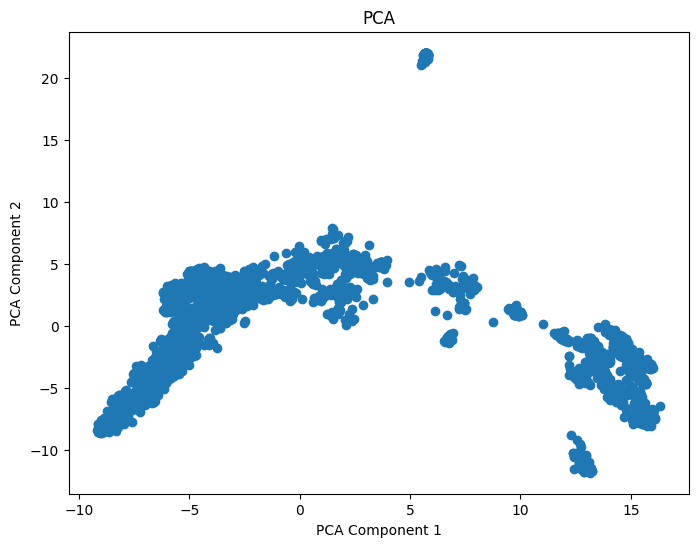

In [18]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_binary)

# Визуализация
plt.figure(figsize=(8, 6))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

plt.title('PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# DBSCAN

In [19]:
reduced_data

array([[-4.37949745,  0.95804215],
       [-4.50484187,  2.96837164],
       [-8.42860604, -7.98963858],
       ...,
       [-4.29295403,  0.65869373],
       [-7.11858811, -5.6969803 ],
       [-6.0400762 , -4.54681082]])

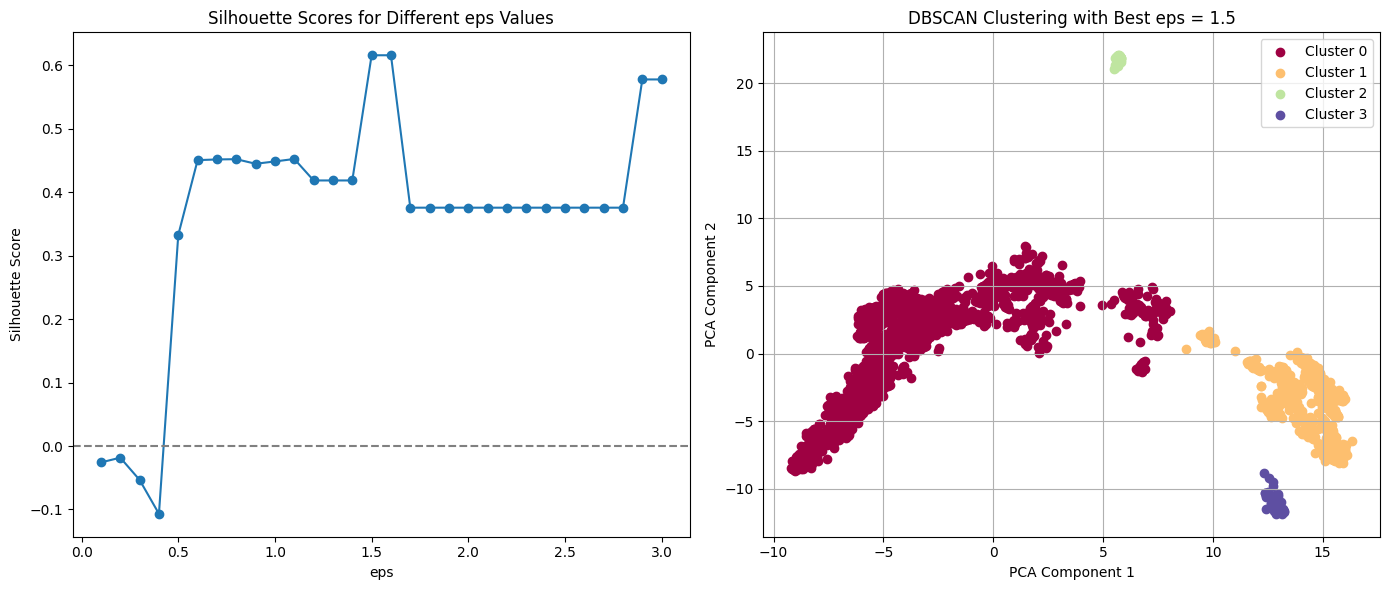

Best eps: 1.5000000000000002, Best Silhouette Score: 0.6160347443846006


In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def draw_tax_pca_dbscan(eps_values, X_binary, reduced_data):
    best_silhouette_score = -1
    best_eps = None

    silhouette_scores_matrix = np.zeros(len(eps_values))

    # Перебор значений eps
    for i, eps in enumerate(eps_values):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X_binary)

        # Проверяем, что есть более одного кластера
        if len(set(labels)) > 1:
            score = silhouette_score(X_binary, labels)
            silhouette_scores_matrix[i] = score

            # Сохраняем лучшие параметры
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_eps = eps
        else:
            silhouette_scores_matrix[i] = -1  # Если только один кластер (или шум)

    # Проверка, найдено ли лучшее значение eps
    if best_eps is None:
        print("Не удалось найти подходящее значение eps. Все кластеризации привели к одному кластеру или шуму.")
        return  # Завершаем выполнение функции

    # Визуализация результатов силуэтного анализа
    plt.figure(figsize=(14, 6))

    # График силуэтных оценок для разных значений eps
    plt.subplot(1, 2, 1)
    plt.plot(eps_values, silhouette_scores_matrix, marker='o')
    plt.title('Silhouette Scores for Different eps Values')
    plt.xlabel('eps')
    plt.ylabel('Silhouette Score')
    plt.axhline(y=0, color='gray', linestyle='--')  # Добавление линии на уровне 0 для справки

    # Кластеризация с лучшими параметрами
    dbscan = DBSCAN(eps=best_eps, min_samples=5)
    clusters = dbscan.fit_predict(reduced_data)
    unique_labels = set(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    # График распределения точек
    plt.subplot(1, 2, 2)
    for k, col in zip(unique_labels, colors):
        class_member_mask = (clusters == k)
        xy = reduced_data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')

    plt.title(f'DBSCAN Clustering with Best eps = {round(best_eps, 2)}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    print(f'Best eps: {best_eps}, Best Silhouette Score: {best_silhouette_score}')

# Пример использования
eps_values = np.arange(0.1, 3.1, 0.1)

draw_tax_pca_dbscan(eps_values, reduced_data, reduced_data)


In [21]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(reduced_data)

In [22]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
clusters_df = pd.DataFrame(clusters, index=X.columns, columns=['Cluster'])
clusters_df

Cluster
V350181262_110_43        0
V350181262_110_51        0
V350181262_110_52        0
V350181262_110_62        0
V350181262_110_74        1
...                    ...
V350181262_134_4         0
V350181262_134_45        1
V350181262_134_52        0
V350181262_134_6         0
V350181262_134_98        0

[4881 rows x 1 columns]

In [24]:
merged_df = clusters_df.join(meta, how='inner')

In [25]:
merged_df

Cluster          sample   Kingdom            Phylum  \
V350181262_110_43        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_51        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_52        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_62        0  V350181262_110  Bacteria  Actinobacteriota   
V350181262_110_74        1  V350181262_110  Bacteria      Bacteroidota   
...                    ...             ...       ...               ...   
V350181262_134_4         0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_45        1  V350181262_134  Bacteria      Bacteroidota   
V350181262_134_52        0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_6         0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_98        0  V350181262_134  Bacteria      Firmicutes_A   

                            Class               Order              Family  \
V350181262_110_43      Clostridia  Christensenellales              CAG-74   
V350181262_110_51      Clostridia     Oscillospirales  Acutalibacteraceae   
V350181262_110_52      Clostridia      Lachnospirales     Lachnospiraceae   
V350181262_110_62  Coriobacteriia    Coriobacteriales     Eggerthellaceae   
V350181262_110_74     Bacteroidia       Bacteroidales       Rikenellaceae   
...                           ...                 ...                 ...   
V350181262_134_4       Clostridia     Oscillospirales  Acutalibacteraceae   
V350181262_134_45     Bacteroidia       Bacteroidales      Marinifilaceae   
V350181262_134_52      Clostridia  Christensenellales              CAG-74   
V350181262_134_6       Clostridia      Lachnospirales     Lachnospiraceae   
V350181262_134_98      Clostridia      Lachnospirales     Lachnospiraceae   

                           Genus                    Species   ID_KYH  ...  \
V350181262_110_43       UBA11524       UBA11524 sp000437595  1102033  ...   
V350181262_110_51  Eubacterium_R  Eubacterium_R sp000433975  1102033  ...   
V350181262_110_52   Agathobacter        Agathobacter faecis  1102033  ...   
V350181262_110_62  Adlercreutzia    Adlercreutzia celatus_A  1102033  ...   
V350181262_110_74      Alistipes     Alistipes avistercoris  1102033  ...   
...                          ...                        ...      ...  ...   
V350181262_134_4   Eubacterium_R  Eubacterium_R sp000436835  1128065  ...   
V350181262_134_45    Odoribacter   Odoribacter splanchnicus  1128065  ...   
V350181262_134_52     Limiplasma                        NaN  1128065  ...   
V350181262_134_6         CAG-127        CAG-127 sp900319515  1128065  ...   
V350181262_134_98  Eubacterium_F  Eubacterium_F sp003491505  1128065  ...   

                      ID_ESSE  age_at_baseline weight_kg tuberculosis  \
V350181262_110_43         NaN        37.604381      90.4          NaN   
V350181262_110_51         NaN        37.604381      90.4          NaN   
V350181262_110_52         NaN        37.604381      90.4          NaN   
V350181262_110_62         NaN        37.604381      90.4          NaN   
V350181262_110_74         NaN        37.604381      90.4          NaN   
...                       ...              ...       ...          ...   
V350181262_134_4   11139001.0        74.000000      65.0           no   
V350181262_134_45  11139001.0        74.000000      65.0           no   
V350181262_134_52  11139001.0        74.000000      65.0           no   
V350181262_134_6   11139001.0        74.000000      65.0           no   
V350181262_134_98  11139001.0        74.000000      65.0           no   

                  kidney.disease freq_drinking_alcо  YEAR  Without_repeats  \
V350181262_110_43            yes    Monthly or less  2017             True   
V350181262_110_51            yes    Monthly or less  2017             True   
V350181262_110_52            yes    Monthly or less  2017             True   
V350181262_110_62            yes    Monthly or less  2017             True   
V350181262_11

In [26]:
merged_df['bmi_group'] = pd.Categorical(merged_df['bmi_group'], categories=['Lean', 'Overweight', 'Obesity'], ordered=True)

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests

def perform_chi_squared_tests(df, features, cluster_col):
    results = []

    # Perform Chi-squared test for each feature
    for feature in features:
        contingency_table = pd.crosstab(df[feature], df[cluster_col])

        # Perform Chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

        # Save results in a list
        results.append({
            'Feature': feature,
            'Chi-squared Statistic': chi2_stat,
            'P-value': p_value
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Adjust p-values for multiple comparisons
    results_df['Adjusted P-value'] = multipletests(results_df['P-value'], method='fdr_bh')[1]

    return results_df

In [28]:
list_of_interest_features = ['bmi_group', 'Phylum']
results_df = perform_chi_squared_tests(merged_df, list_of_interest_features, 'Cluster')

# Print the results
for index, row in results_df.iterrows():
    print(f"\nРезультаты теста хи-квадрат для признака {row['Feature']}:")
    print(f"Chi-squared Statistic: {row['Chi-squared Statistic']}")
    print(f"P-value: {row['P-value']}")
    print(f"Adjusted P-value: {row['Adjusted P-value']}")



Результаты теста хи-квадрат для признака bmi_group:
Chi-squared Statistic: 24.598197615487454
P-value: 0.0004051653239338616
Adjusted P-value: 0.0004051653239338616

Результаты теста хи-квадрат для признака Phylum:
Chi-squared Statistic: 11572.38476765116
P-value: 0.0
Adjusted P-value: 0.0


In [29]:
bmi_palette = {
    'Lean': '#2a9d8f',
    'Overweight': '#f77f00',
    'Obesity': '#c1121f'
}
palette_c24 = [
    "#808080",  # Темно-серый (вместо Light gray)
    "#007bff",  # Яркий синий (вместо Soft blue)
    "#ff3737",  # Яркий красный (вместо Soft red)
    "#34c759",  # Яркий зеленый (вместо Soft green)
    "#8e44ad",  # Яркий фиолетовый (вместо Soft purple)
    "#ffa07a",  # Яркий оранжевый (вместо Soft orange)
    "#ffd700",  # Яркий золотой (вместо Soft gold)
    "#00bfff",  # Яркий небесно-синий (вместо Light sky blue)
    "#ff69b4",  # Яркий розовый (вместо Light pink)
    "#c51077",  # Яркий лавандовый (вместо Light lavender)
    "#ffc0cb",  # Яркий персиковый (вместо Light peach)
    "#964b00",  # Яркий хаки (вместо Soft khaki)
    "#8b0a1a",  # Яркий бордовый (вместо Soft maroon/purple)
    "#c51077",  # Яркий орхидейный (вместо Soft orchid)
    "#ff69b4",  # Яркий глубокий розовый (вместо Soft deep pink)
    "#007bff",  # Яркий синий (вместо Light blue)
    "#4682b4",  # Яркий стальной синий (вместо Soft steel blue)
    "#1abc9c",  # Яркий бирюзовый (вместо Light turquoise)
    "#34c759",  # Яркий зеленый (вместо Light green)
    "#ffff00",  # Яркий желтый (вместо Light yellow)
    "#ffff00",  # Яркий желтый (вместо Soft yellow)
    "#ffa500",  # Яркий оранжевый (вместо Light orange)
    "#964b00"   # Яркий коричневый (вместо Soft brown)
]

def create_plot_rel(cols, ps_meta):
    # Группировка данных и подсчет количества
    dataex = ps_meta.groupby(cols).size().reset_index(name='N')
    total_counts = dataex.groupby(cols[0])['N'].transform('sum')
    # Расчет относительных частот
    dataex['rel_count'] = dataex['N'] / total_counts
    
    # Выполнение теста хи-квадрат
    contingency_table = pd.crosstab(ps_meta[cols[0]], ps_meta[cols[1]])
    chisq_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chisq_pvalue = format(p_value, '.3f')
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    if cols[1] == 'bmi_group':
        bar_plot = sns.barplot(x=cols[0], y='rel_count', hue=cols[1], data=dataex, palette= bmi_palette)
    else:
        bar_plot = sns.barplot(x=cols[0], y='rel_count', hue=cols[1], data=dataex, palette=palette_c24)
    
    # Добавление процентов на график
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():.1%}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', 
                          fontsize=10)
    
    plt.title(f'Chi-squared p-value: {chisq_pvalue}')
    plt.xlabel(cols[0])
    plt.ylabel('Relative Count')
    plt.legend(title=cols[1],loc="lower center",
    bbox_to_anchor=(.5, -0.3), ncol=3)#,labels = ['bmi<=25','25<bmi<=30','bmi>30'])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f'cluster_{cols[1]}_plot.png', dpi=300, bbox_inches='tight')
    plt.show()


/tmp/ipykernel_751721/1992613055.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataex = ps_meta.groupby(cols).size().reset_index(name='N')
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ku

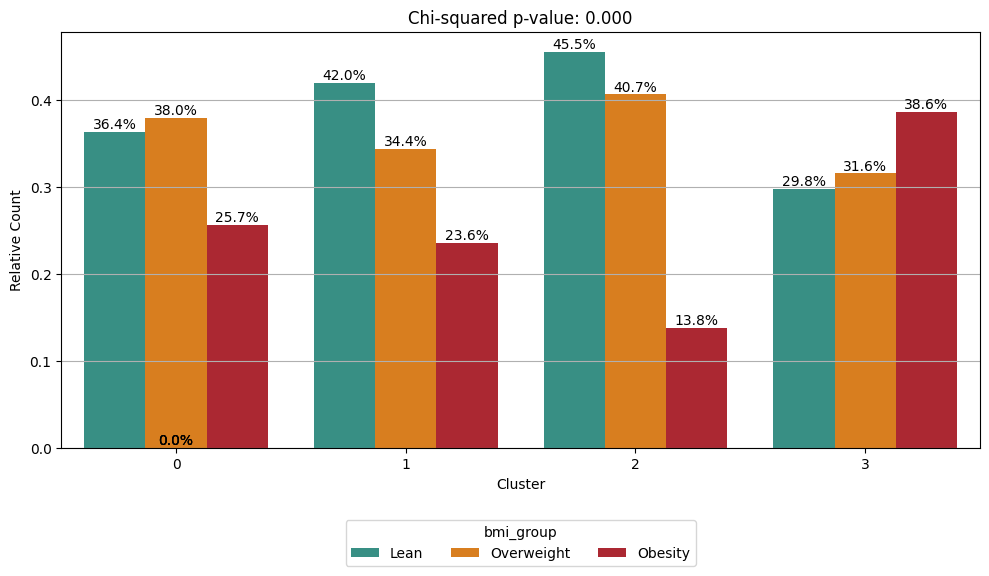

In [30]:
create_plot_rel([ 'Cluster','bmi_group'], merged_df)


/tmp/ipykernel_751721/1992613055.py:49: UserWarning: The palette list has more values (23) than needed (13), which may not be intended.
  bar_plot = sns.barplot(x=cols[0], y='rel_count', hue=cols[1], data=dataex, palette=palette_c24)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping 

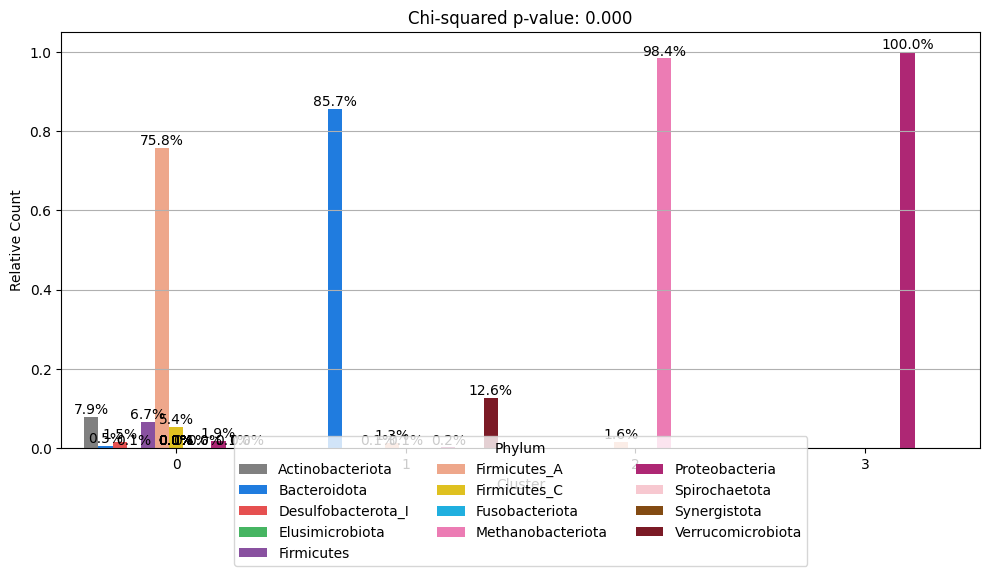

In [31]:
create_plot_rel([ 'Cluster','Phylum'], merged_df)

In [32]:
explained_variance = pca.explained_variance_ratio_
weights = pca.components_
print(f'explained_variance:{explained_variance}')
print(f'weights:{weights}')

explained_variance:[0.145991   0.06784145]
weights:[[-3.15414771e-02 -9.06989216e-04 -6.92003156e-03 ...  4.17657655e-05
   1.09373739e-05 -1.12044019e-05]
 [ 1.94714973e-02 -3.42816633e-04 -2.44701933e-03 ... -2.88217070e-05
   1.56824298e-05 -2.20076886e-05]]


In [33]:
explained_variance = pca.explained_variance_ratio_
weights = pca.components_
print(f'explained_variance:{explained_variance}')
# Создание DataFrame для веса признаков
importance_df = pd.DataFrame(weights.T, columns=[f'PC{i+1}' for i in range(weights.shape[0])], index=X.index)
#importance_df['explained_variance'] = explained_variance

sorted_importance_df = importance_df.sort_values(by='PC1', ascending=False)

# Печать отсортированного DataFrame
print(sorted_importance_df)

explained_variance:[0.145991   0.06784145]
             PC1       PC2
enzyme                    
K03559  0.052256  0.001708
K03561  0.052172  0.001958
K00946  0.049671  0.000624
K06142  0.049465 -0.017647
K00240  0.049365  0.003417
...          ...       ...
K06379 -0.052096 -0.017775
K07699 -0.052103 -0.016844
K06399 -0.052243 -0.017052
K06398 -0.052305 -0.016482
K06438 -0.052330 -0.016883

[6625 rows x 2 columns]


In [34]:
sorted_importance_df = importance_df.sort_values(by='PC1', ascending=False)

# Печать отсортированного DataFrame
print(f'explained_variance:{explained_variance}')
print(sorted_importance_df)

explained_variance:[0.145991   0.06784145]
             PC1       PC2
enzyme                    
K03559  0.052256  0.001708
K03561  0.052172  0.001958
K00946  0.049671  0.000624
K06142  0.049465 -0.017647
K00240  0.049365  0.003417
...          ...       ...
K06379 -0.052096 -0.017775
K07699 -0.052103 -0.016844
K06399 -0.052243 -0.017052
K06398 -0.052305 -0.016482
K06438 -0.052330 -0.016883

[6625 rows x 2 columns]


# DA TAXA

## Methanobrevibacter_A smithii

In [35]:
meta_taxa = merged_df[merged_df['Genus'] == 'Methanobrevibacter_A']

In [36]:
meta_taxa = meta_taxa[meta_taxa.index != 'V350174473_18_1']

In [37]:
meta_taxa = meta_taxa[meta_taxa.index != 'V350181201_42_30']

In [38]:
X_taxa = X.loc[:, X.columns.isin(meta_taxa.index)]

In [39]:
X_taxa

V350166995_94_49  V350181201_41_3  V350166995_83_67_sub  \
enzyme                                                            
K00003               1.0              1.0                   1.0   
K00004               0.0              0.0                   0.0   
K00005               0.0              0.0                   0.0   
K00007               0.0              0.0                   0.0   
K00008               0.0              0.0                   0.0   
...                  ...              ...                   ...   
K25659               0.0              0.0                   0.0   
K25775               0.0              0.0                   0.0   
K25806               0.0              0.0                   0.0   
K26061               0.0              0.0                   0.0   
K26284               0.0              0.0                   0.0   

        V350181323_23_84  V350181321_118_33  V350181323_29_30  V350174473_3_7  \
enzyme                                                                          
K00003               1.0                1.0               1.0             1.0   
K00004               0.0                0.0               0.0             0.0   
K00005               0.0                0.0               0.0             0.0   
K00007               0.0                0.0               0.0             0.0   
K00008               0.0                0.0               0.0             0.0   
...                  ...                ...               ...             ...   
K25659               0.0                0.0               0.0             0.0   
K25775               0.0                0.0               0.0             0.0   
K25806               0.0                0.0               0.0             0.0   
K26061               0.0                0.0               0.0             0.0   
K26284               0.0                0.0               0.0             0.0   

        V350181262_102_42  V350181323_18_58  V350174473_22_48  ...  \
enzyme                                                         ...   
K00003                1.0               1.0               1.0  ...   
K00004                0.0               0.0               0.0  ...   
K00005                0.0               0.0               0.0  ...   
K00007                0.0               0.0               0.0  ...   
K00008                0.0               0.0               0.0  ...   
...                   ...               ...               ...  ...   
K25659                0.0               0.0               0.0  ...   
K25775                0.0               0.0               0.0  ...   
K25806                0.0               0.0               0.0  ...   
K26061                0.0               0.0               0.0  ...   
K26284                0.0               0.0               0.0  ...   

        V350174473_66_6  V350181323_39_4  V350181321_143_8  \
enzyme                                                       
K00003              1.0              1.0               1.0   
K00004              0.0              0.0               0.0   
K00005              0.0              0.0               0.0   
K00007              0.0              0.0               0.0   
K00008              0.0              0.0               0.0   
...                 ...              ...               ...   
K25659              0.0              0.0               0.0   
K25775              0.0              0.0               0.0   
K25806              0.0              0.0               0.0   
K26061              0.0              0.0               0.0   
K26284              0.0              0.0               0.0   

        V350181321_157_s65  V350174473_67_s5  V350166995_171_s17  \
enzyme                                                             
K00003                 1.0               1.0                 1.0   
K00004                 0.0               0.0                 0.0   
K00005                 0.0               0.0                 0.0   
K00007                 0

In [40]:
X_binary = np.where(X_taxa > 0, 1, 0)
X_binary = X_binary.T
X_binary

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [41]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_binary) 

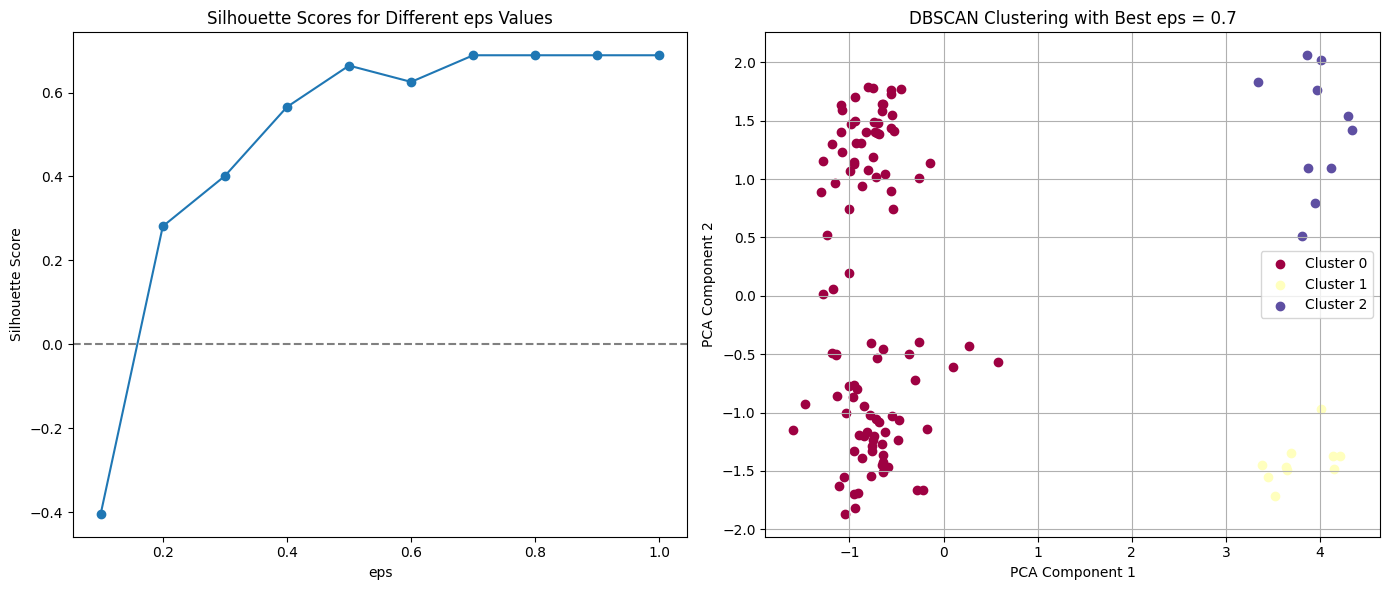

Best eps: 0.7000000000000001, Best Silhouette Score: 0.6889048588748878


In [42]:
eps_values = np.arange(0.1, 1.1, 0.1)

draw_tax_pca_dbscan(eps_values, reduced_data, reduced_data)

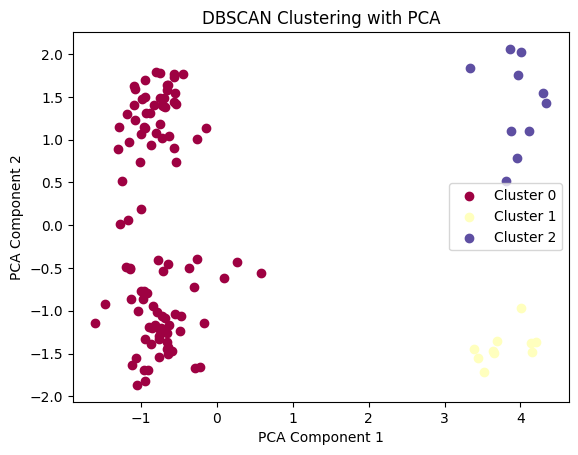

In [43]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
clusters = dbscan.fit_predict(reduced_data)
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Шум (некластеризованные точки)
        col = [0, 0, 0, 1]  # Черный цвет для шума

    class_member_mask = (clusters == k)

    # Рисуем точки
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [44]:
clusters_df = pd.DataFrame(clusters, index=X_taxa.columns, columns=['Cluster'])
clusters_df

Cluster
V350166995_94_49            0
V350181201_41_3             0
V350166995_83_67_sub        0
V350181323_23_84            0
V350181321_118_33           2
...                       ...
V350166995_171_s17          0
V350166995_174_s42          0
V350181201_18_2             0
V350181323_43_3             0
V350181262_134_s41          0

[120 rows x 1 columns]

In [45]:
meta_taxa = meta_taxa.drop('Cluster', axis=1)
merged_df_taxa = clusters_df.join(meta_taxa, how='inner')
merged_df_taxa['bmi_group'] = pd.Categorical(merged_df_taxa['bmi_group'], categories=['Lean', 'Overweight', 'Obesity'], ordered=True)

In [46]:
list_of_interest_features = ['bmi_group', 'YEAR', 'Phylum','age_at_heath_check_10yr']
results_df = perform_chi_squared_tests(merged_df_taxa, list_of_interest_features, 'Cluster')

# Print the results
for index, row in results_df.iterrows():
    print(f"\nРезультаты теста хи-квадрат для признака {row['Feature']}:")
    print(f"Chi-squared Statistic: {row['Chi-squared Statistic']}")
    print(f"P-value: {row['P-value']}")
    print(f"Adjusted P-value: {row['Adjusted P-value']}")



Результаты теста хи-квадрат для признака bmi_group:
Chi-squared Statistic: 5.712111111111112
P-value: 0.2217042990285793
Adjusted P-value: 0.444405006374253

Результаты теста хи-квадрат для признака YEAR:
Chi-squared Statistic: 0.44369747899159645
P-value: 0.801036520359321
Adjusted P-value: 1.0

Результаты теста хи-квадрат для признака Phylum:
Chi-squared Statistic: 0.0
P-value: 1.0
Adjusted P-value: 1.0

Результаты теста хи-квадрат для признака age_at_heath_check_10yr:
Chi-squared Statistic: 8.223206793206792
P-value: 0.2222025031871265
Adjusted P-value: 0.444405006374253


/tmp/ipykernel_751721/1992613055.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataex = ps_meta.groupby(cols).size().reset_index(name='N')
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ku

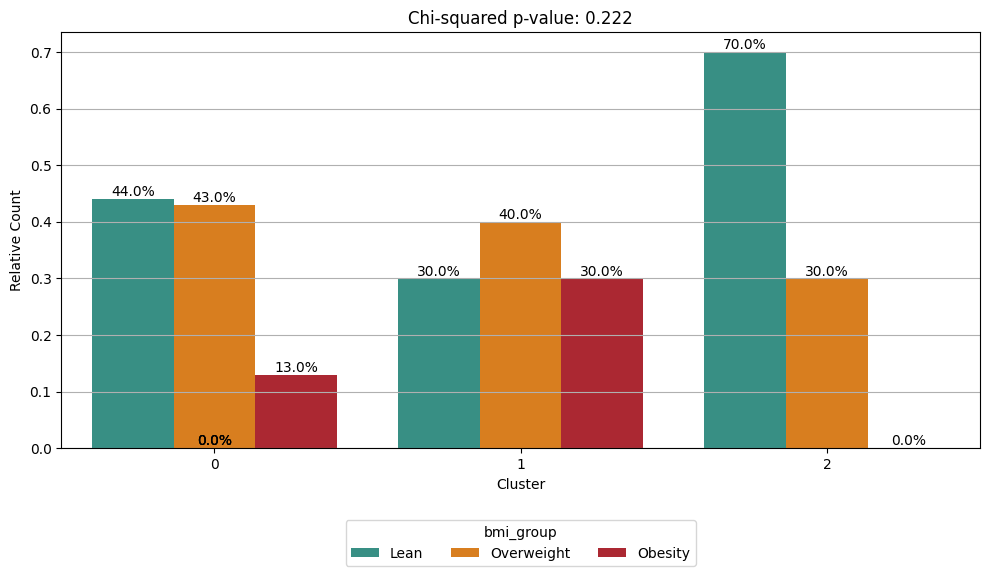

In [47]:
create_plot_rel([ 'Cluster','bmi_group'], merged_df_taxa)

/tmp/ipykernel_751721/1992613055.py:49: UserWarning: The palette list has more values (23) than needed (4), which may not be intended.
  bar_plot = sns.barplot(x=cols[0], y='rel_count', hue=cols[1], data=dataex, palette=palette_c24)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping w

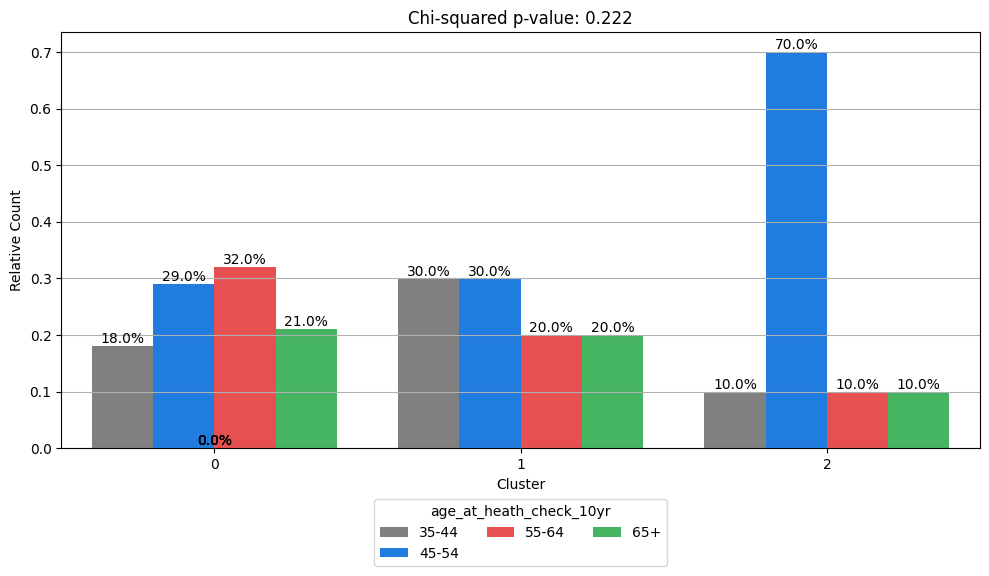

In [48]:
create_plot_rel([ 'Cluster','age_at_heath_check_10yr'], merged_df_taxa)

In [49]:
explained_variance = pca.explained_variance_ratio_
weights = pca.components_
print(f'explained_variance:{explained_variance}')
print(f'weights:{weights}')

explained_variance:[0.14677836 0.07691018]
weights:[[-1.66702698e-18 -1.96421878e-21  7.78206072e-22 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.19147629e-17  4.22556656e-18 -1.97874911e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [50]:
explained_variance = pca.explained_variance_ratio_
weights = pca.components_

# Создание DataFrame для веса признаков
importance_df = pd.DataFrame(weights.T, columns=[f'PC{i+1}' for i in range(weights.shape[0])], index=X_taxa.index)
#importance_df['explained_variance'] = explained_variance

print("Важность признаков:")
print(importance_df)

Важность признаков:
                 PC1           PC2
enzyme                            
K00003 -1.667027e-18  8.191476e-17
K00004 -1.964219e-21  4.225567e-18
K00005  7.782061e-22 -1.978749e-19
K00007  1.629965e-21  1.421504e-19
K00008  3.007545e-21  8.540700e-20
...              ...           ...
K25659  0.000000e+00 -0.000000e+00
K25775  0.000000e+00 -0.000000e+00
K25806  0.000000e+00 -0.000000e+00
K26061  0.000000e+00 -0.000000e+00
K26284  0.000000e+00 -0.000000e+00

[6625 rows x 2 columns]


In [51]:
sorted_importance_df = importance_df.sort_values(by='PC1', ascending=False)

# Печать отсортированного DataFrame
print(sorted_importance_df)

             PC1       PC2
enzyme                    
K07218  0.210232 -0.008620
K23255  0.207686 -0.000395
K11741  0.207686 -0.000395
K02016  0.203066 -0.023117
K03975  0.198728 -0.009789
...          ...       ...
K19589 -0.205635  0.007200
K02020 -0.206026  0.004095
K02017 -0.206552 -0.006217
K21453 -0.207686  0.000395
K02018 -0.208049  0.001135

[6625 rows x 2 columns]


In [52]:
sorted_importance_df = importance_df.sort_values(by='PC1', ascending=False)

# Печать отсортированного DataFrame
print(sorted_importance_df)

             PC1       PC2
enzyme                    
K07218  0.210232 -0.008620
K23255  0.207686 -0.000395
K11741  0.207686 -0.000395
K02016  0.203066 -0.023117
K03975  0.198728 -0.009789
...          ...       ...
K19589 -0.205635  0.007200
K02020 -0.206026  0.004095
K02017 -0.206552 -0.006217
K21453 -0.207686  0.000395
K02018 -0.208049  0.001135

[6625 rows x 2 columns]


1. K07218  is nitrous oxidase accessory protein
2. K23255 is pilA; archaeal type IV pilus assembly protein PilA
3. K11741 is sugE; quaternary ammonium compound-resistance protein SugE
4. K02016 is ABC.FEV.S; iron complex transport system substrate-binding protein
5. K03975 is dedA; membrane-associated protein

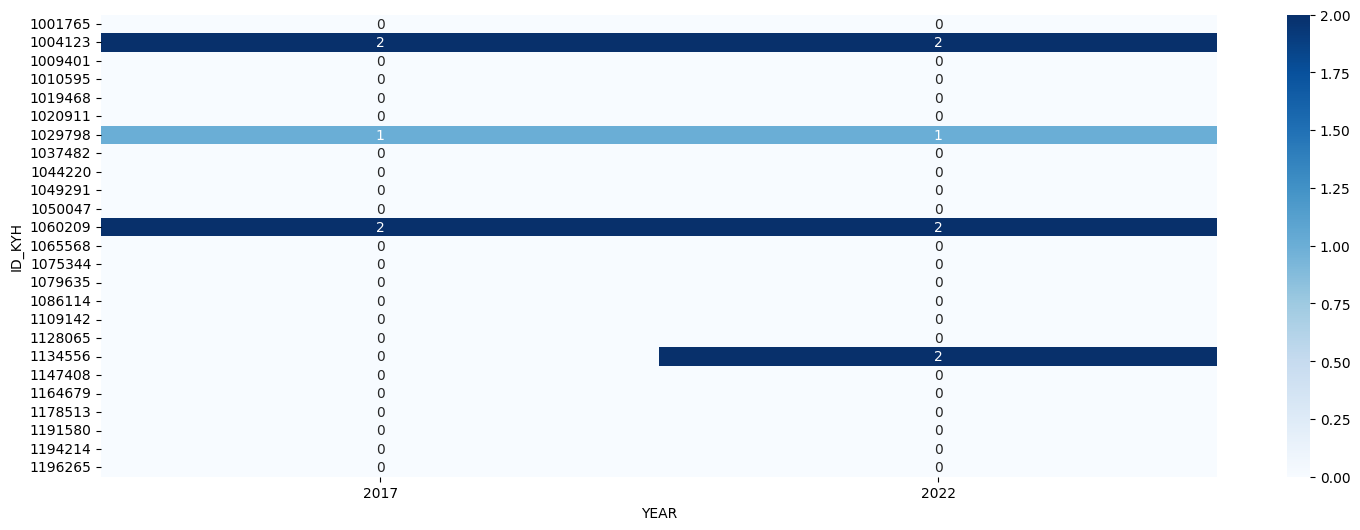

In [60]:
merged_df_sunkey  = clusters_df.merge(
    meta_taxa[['ID_KYH', 'YEAR']], 
    left_on=clusters_df.index, 
    right_on=meta_taxa.index, 
    how='left'
)
pivot_df = merged_df_sunkey.pivot(index='ID_KYH', columns='YEAR', values='Cluster').reset_index()
clean_columns = pivot_df.dropna()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
sns.heatmap(clean_columns.set_index('ID_KYH'), annot=True, cmap='Blues', fmt='g')

plt.show()

## Alistipes_onderdonkii

In [61]:
meta_taxa = merged_df[(merged_df['Species'] == 'Alistipes onderdonkii') ]

In [62]:
meta_taxa

Cluster          sample   Kingdom        Phylum  \
V350181262_110_3             1  V350181262_110  Bacteria  Bacteroidota   
V350181321_126_25            1  V350181321_126  Bacteria  Bacteroidota   
V350181262_98_46             1   V350181262_98  Bacteria  Bacteroidota   
V350181201_31_45             1   V350181201_31  Bacteria  Bacteroidota   
V350181262_108_1             1  V350181262_108  Bacteria  Bacteroidota   
V350181262_107_4             1  V350181262_107  Bacteria  Bacteroidota   
V350181323_32_0              1   V350181323_32  Bacteria  Bacteroidota   
V350166995_57_4              1   V350166995_57  Bacteria  Bacteroidota   
V350174473_26_1              1   V350174473_26  Bacteria  Bacteroidota   
V350166995_72_48             1   V350166995_72  Bacteria  Bacteroidota   
V350181201_30_2              0   V350181201_30  Bacteria  Bacteroidota   
V350181201_44_2              1   V350181201_44  Bacteria  Bacteroidota   
V350181262_117_2             1  V350181262_117  Bacteria  Bacteroidota   
V350166995_86_77             1   V350166995_86  Bacteria  Bacteroidota   
V350181262_99_39             1   V350181262_99  Bacteria  Bacteroidota   
V350181321_113_0             1  V350181321_113  Bacteria  Bacteroidota   
V350181323_162_0             1  V350181323_162  Bacteria  Bacteroidota   
V350181262_140_9             1  V350181262_140  Bacteria  Bacteroidota   
V350181262_150_0             1  V350181262_150  Bacteria  Bacteroidota   
V350181262_149_1             1  V350181262_149  Bacteria  Bacteroidota   
V350174473_37_s114           1   V350174473_37  Bacteria  Bacteroidota   
V350174473_52_s35            1   V350174473_52  Bacteria  Bacteroidota   
V350181262_158_8             1  V350181262_158  Bacteria  Bacteroidota   
V350181262_160_0             1  V350181262_160  Bacteria  Bacteroidota   
V350174473_72_s72_sub        1   V350174473_72  Bacteria  Bacteroidota   
V350166995_163_s27           1  V350166995_163  Bacteria  Bacteroidota   
V350181323_51_s95            1   V350181323_51  Bacteria  Bacteroidota   
V350166995_169_4             1  V350166995_169  Bacteria  Bacteroidota   
V350181321_139_33            1  V350181321_139  Bacteria  Bacteroidota   
V350181201_19_1              1   V350181201_19  Bacteria  Bacteroidota   
V350181262_130_7             1  V350181262_130  Bacteria  Bacteroidota   
V350181323_49_5              1   V350181323_49  Bacteria  Bacteroidota   
V350181321_132_0             1  V350181321_132  Bacteria  Bacteroidota   
V350166995_166_s87           1  V350166995_166  Bacteria  Bacteroidota   
V350166995_168_s28           1  V350166995_168  Bacteria  Bacteroidota   
V350181262_145_2             1  V350181262_145  Bacteria  Bacteroidota   
V350174473_42_s57            1   V350174473_42  Bacteria  Bacteroidota   
V350181262_142_6             1  V350181262_142  Bacteria  Bacteroidota   
V350181323_34_8              1   V350181323_34  Bacteria  Bacteroidota   
V350174473_66_s56            1   V350174473_66  Bacteria  Bacteroidota   
V350166995_164_1             1  V350166995_164  Bacteria  Bacteroidota   
V350181262_134_29            1  V350181262_134  Bacteria  Bacteroidota   

                             Class          Order         Family      Genus  \
V350181262_110_3       Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350181321_126_25      Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350181262_98_46       Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350181201_31_45       Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350181262_108_1       Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350181262_107_4       Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350181323_32_0        Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350166995_57_4        Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350174473_26_1        Bacteroidia  Bacteroidales  Rikenellaceae  Alistipes   
V350166995_72_48       Bacteroidia  Bacteroidales 

In [63]:
meta_taxa.index

Index(['V350181262_110_3', 'V350181321_126_25', 'V350181262_98_46',
       'V350181201_31_45', 'V350181262_108_1', 'V350181262_107_4',
       'V350181323_32_0', 'V350166995_57_4', 'V350174473_26_1',
       'V350166995_72_48', 'V350181201_30_2', 'V350181201_44_2',
       'V350181262_117_2', 'V350166995_86_77', 'V350181262_99_39',
       'V350181321_113_0', 'V350181323_162_0', 'V350181262_140_9',
       'V350181262_150_0', 'V350181262_149_1', 'V350174473_37_s114',
       'V350174473_52_s35', 'V350181262_158_8', 'V350181262_160_0',
       'V350174473_72_s72_sub', 'V350166995_163_s27', 'V350181323_51_s95',
       'V350166995_169_4', 'V350181321_139_33', 'V350181201_19_1',
       'V350181262_130_7', 'V350181323_49_5', 'V350181321_132_0',
       'V350166995_166_s87', 'V350166995_168_s28', 'V350181262_145_2',
       'V350174473_42_s57', 'V350181262_142_6', 'V350181323_34_8',
       'V350174473_66_s56', 'V350166995_164_1', 'V350181262_134_29'],
      dtype='object')

In [64]:
meta_taxa = meta_taxa[meta_taxa.index != 'V350181201_30_2']

In [65]:
X_taxa = X.loc[:, X.columns.isin(meta_taxa.index)]
X_binary = np.where(X_taxa > 0, 1, 0)
X_binary = X_binary.T
X_binary

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [66]:
X_binary.shape

(41, 6625)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


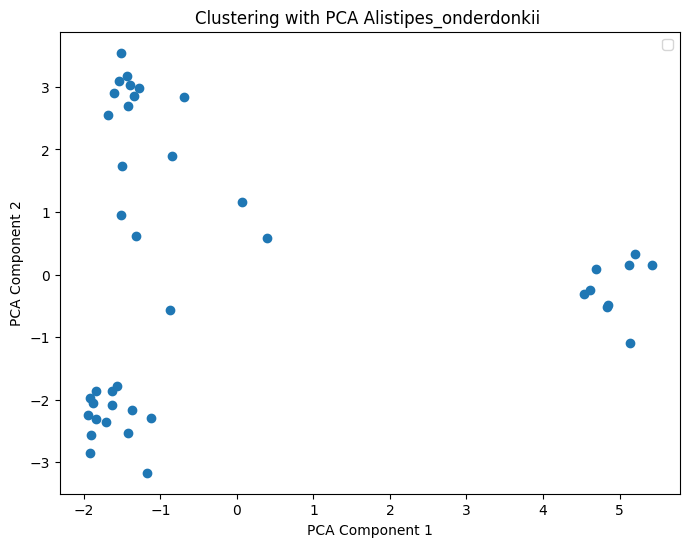

In [67]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_binary) 
plt.figure(figsize=(8, 6))

# Разделяем точки по кластерам

plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

plt.title('Clustering with PCA Alistipes_onderdonkii ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

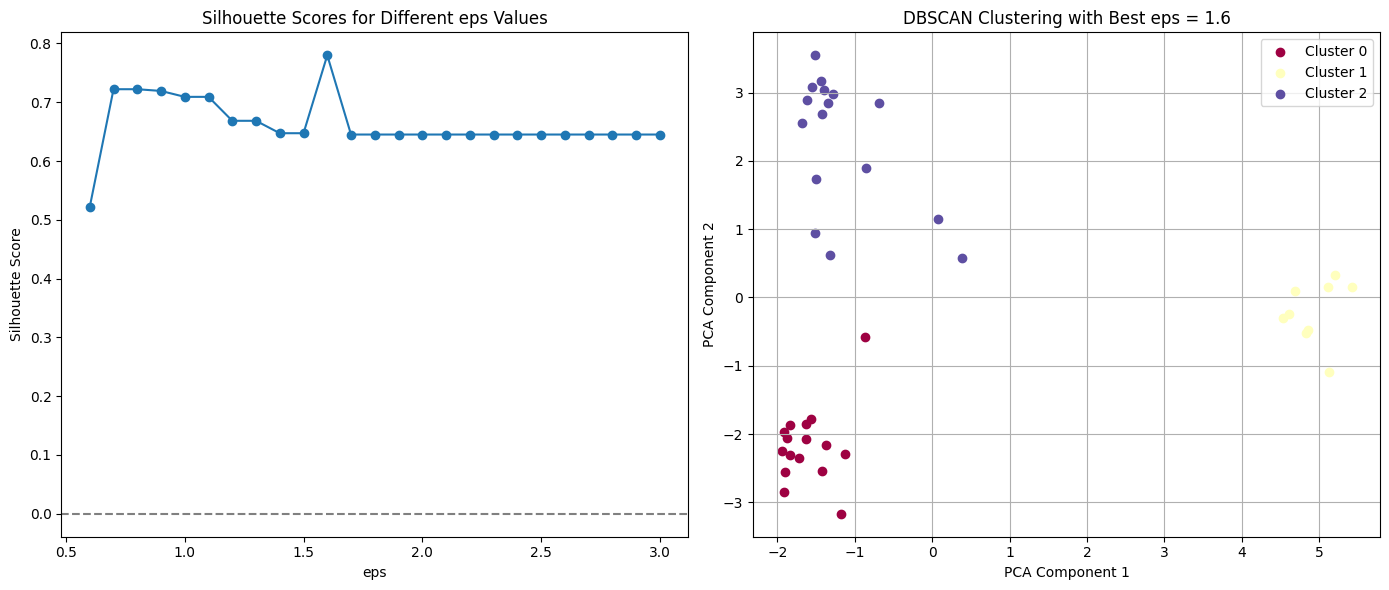

Best eps: 1.5999999999999996, Best Silhouette Score: 0.779870828576937


In [68]:
eps_values = np.arange(0.6, 3.1, 0.1)

draw_tax_pca_dbscan(eps_values, reduced_data, reduced_data)

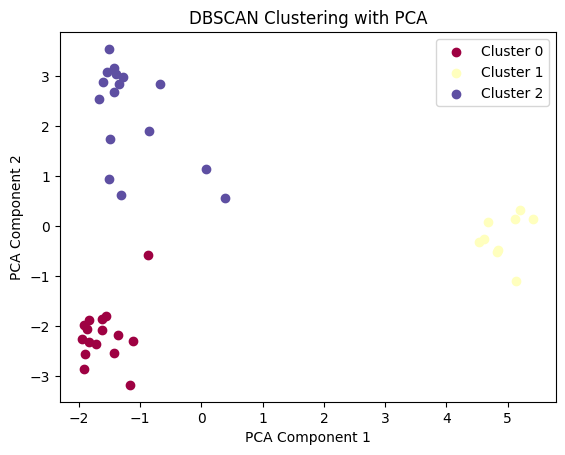

In [69]:
dbscan = DBSCAN(eps=1.6, min_samples=5)
clusters = dbscan.fit_predict(reduced_data)
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Шум (некластеризованные точки)
        col = [0, 0, 0, 1]  # Черный цвет для шума

    class_member_mask = (clusters == k)

    # Рисуем точки
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [70]:
clusters_df = pd.DataFrame(clusters, index=X_taxa.columns, columns=['Cluster'])
meta_taxa = meta_taxa.drop('Cluster', axis=1)
merged_df_taxa = clusters_df.join(meta_taxa, how='inner')
merged_df_taxa['bmi_group'] = pd.Categorical(merged_df_taxa['bmi_group'], categories=['Lean', 'Overweight', 'Obesity'], ordered=True)

In [71]:
list_of_interest_features = ['bmi_group']
results_df = perform_chi_squared_tests(merged_df_taxa, list_of_interest_features, 'Cluster')

# Print the results
for index, row in results_df.iterrows():
    print(f"\nРезультаты теста хи-квадрат для признака {row['Feature']}:")
    print(f"Chi-squared Statistic: {row['Chi-squared Statistic']}")
    print(f"P-value: {row['P-value']}")
    print(f"Adjusted P-value: {row['Adjusted P-value']}")


Результаты теста хи-квадрат для признака bmi_group:
Chi-squared Statistic: 7.08313291646625
P-value: 0.13155970883484652
Adjusted P-value: 0.13155970883484652


/tmp/ipykernel_751721/1992613055.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataex = ps_meta.groupby(cols).size().reset_index(name='N')
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kuzmichenko_pa/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ku

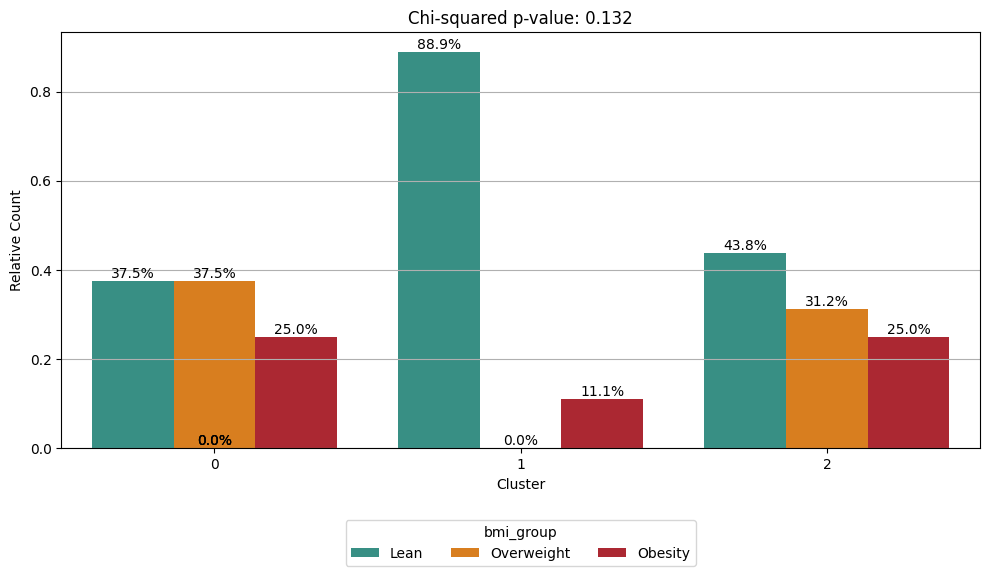

In [72]:
create_plot_rel([ 'Cluster','bmi_group'], merged_df_taxa)

In [73]:
explained_variance = pca.explained_variance_ratio_
weights = pca.components_
print(f'explained_variance:{explained_variance}')
# Создание DataFrame для веса признаков
importance_df = pd.DataFrame(weights.T, columns=[f'PC{i+1}' for i in range(weights.shape[0])], index=X_taxa.index)
#importance_df['explained_variance'] = explained_variance

sorted_importance_df = importance_df.sort_values(by='PC1', ascending=False)

# Печать отсортированного DataFrame
print(sorted_importance_df)

explained_variance:[0.16788511 0.10426973]
             PC1       PC2
enzyme                    
K06221  0.154675 -0.001008
K07126  0.154429 -0.007424
K03760  0.153332 -0.004214
K03534  0.153086 -0.010630
K22481  0.153086 -0.010630
...          ...       ...
K00067 -0.119886  0.002652
K00973 -0.131616 -0.017623
K13195 -0.142067  0.030874
K09817 -0.146517 -0.029222
K07387 -0.150154  0.000098

[6625 rows x 2 columns]


1. K06221 is 2,5-diketo-D-gluconate reductase A (EC: 1.1.1.346)
2. K07126 is uncharacterized protein
3. K03760 is lipid A ethanolaminephosphotransferase [EC:2.7.8.43]
4. K03534 is rhaM; L-rhamnose mutarotase [EC:5.1.3.32]
5. hdrB1; heterodisulfide reductase subunit B1 [EC:1.8.7.3]

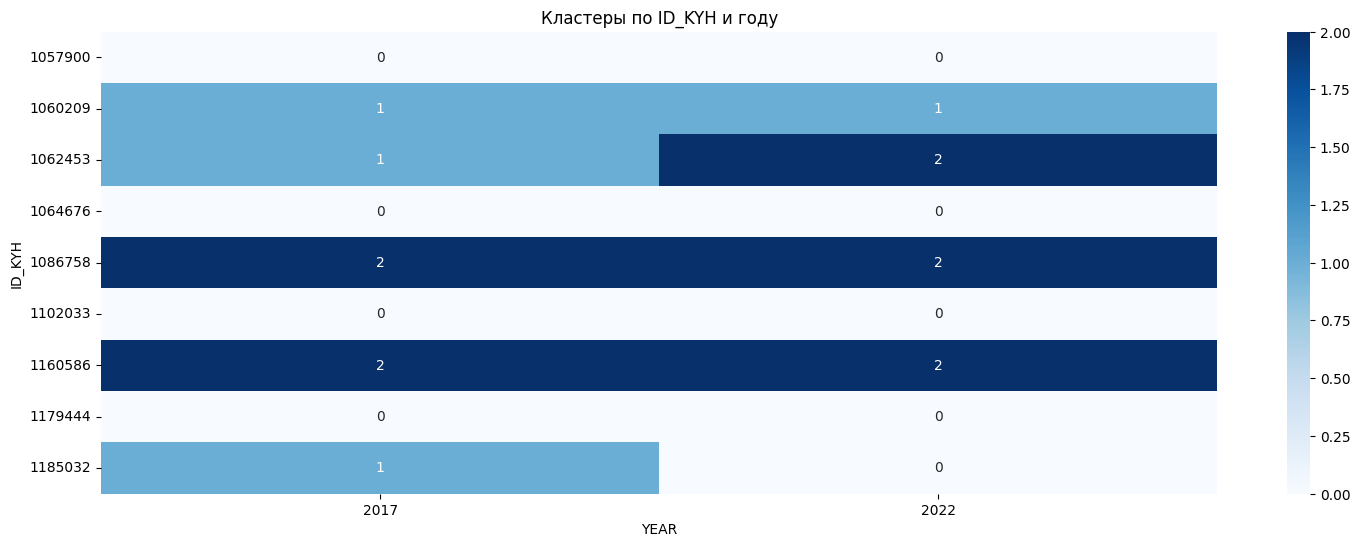

In [75]:
merged_df_sunkey  = clusters_df.merge(
    meta_taxa[['ID_KYH', 'YEAR']], 
    left_on=clusters_df.index, 
    right_on=meta_taxa.index, 
    how='left'
)
pivot_df = merged_df_sunkey.pivot(index='ID_KYH', columns='YEAR', values='Cluster').reset_index()
clean_columns = pivot_df.dropna()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
sns.heatmap(clean_columns.set_index('ID_KYH'), annot=True, cmap='Blues', fmt='g')
plt.title('Кластеры по ID_KYH и году')
plt.show()

# TSNE 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [76]:
X_tsne = X.loc[:,X.columns.isin(merged_df.index)]
X_tsne

V350181262_110_43  V350181262_110_51  V350181262_110_52  \
enzyme                                                            
K00003                1.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_62  V350181262_110_74  V350181262_110_12  \
enzyme                                                            
K00003                1.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                2.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_14  V350181262_110_19  V350181262_110_23  \
enzyme                                                            
K00003                1.0                1.0                0.0   
K00004                0.0                0.0                0.0   
K00005                2.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...                   ...                ...                ...   
K25659                0.0                0.0                0.0   
K25775                0.0                0.0                0.0   
K25806                0.0                0.0                0.0   
K26061                0.0                0.0                0.0   
K26284                0.0                0.0                0.0   

        V350181262_110_3  ...  V350181262_134_3  V350181262_134_30  \
enzyme                    ...                                        
K00003               1.0  ...               1.0                0.0   
K00004               0.0  ...               0.0                0.0   
K00005               0.0  ...               0.0                0.0   
K00007               0.0  ...               0.0                0.0   
K00008               0.0  ...               0.0                0.0   
...                  ...  ...               ...                ...   
K25659               0.0  ...               0.0                0.0   
K25775               0.0  ...               0.0                0.0   
K25806               0.0  ...               0.0                0.0   
K26061               0.0  ...               0.0                0.0   
K26284               0.0  ...               0.0                0.0   

        V350181262_134_31  V350181262_134_32  V350181262_134_35  \
enzyme                                                            
K00003                0.0                1.0                1.0   
K00004                0.0                0.0                0.0   
K00005                0.0                0.0                0.0   
K00007                0.0                0.0                0.0   
K00008                0.0                0.0                0.0   
...         

In [78]:
tsne_df = pd.DataFrame(X_tsne.columns)
tsne_df = tsne_df.set_index(0)
tsne_df

Empty DataFrame
Columns: []
Index: [V350181262_110_43, V350181262_110_51, V350181262_110_52, V350181262_110_62, V350181262_110_74, V350181262_110_12, V350181262_110_14, V350181262_110_19, V350181262_110_23, V350181262_110_3, V350181262_110_35, V350181262_110_4, V350181262_110_5, V350166995_93_106, V350166995_93_115, V350166995_93_14, V350166995_93_24, V350166995_93_46, V350166995_93_63, V350166995_93_92, V350166995_93_98, V350166995_93_10, V350166995_93_11, V350166995_93_16, V350166995_93_18, V350166995_93_21, V350166995_93_23, V350166995_93_3, V350166995_93_33, V350166995_93_4, V350166995_93_43, V350166995_93_7, V350166995_93_79, V350166995_93_9, V350174473_19_105, V350174473_19_38, V350174473_19_45, V350174473_19_46, V350174473_19_64, V350174473_19_88, V350174473_19_0, V350174473_19_1, V350174473_19_10, V350174473_19_11, V350174473_19_22, V350174473_19_3, V350174473_19_48, V350174473_19_9, V350166995_82_28, V350166995_82_39, V350166995_82_76, V350166995_82_0, V350166995_82_1, V350166995_82_11, V350166995_82_12, V350166995_82_23, V350166995_82_3, V350166995_82_4, V350181323_165_2, V350181323_165_22, V350181323_165_24, V350181201_43_21_sub, V350181201_43_38, V350181201_43_1, V350181201_43_2, V350181201_43_8, V350181201_32_1, V350181201_32_16, V350181201_32_17, V350181201_32_24, V350181201_32_26, V350181201_32_30, V350181201_32_46, V350181201_32_56, V350181201_32_72, V350181201_32_10, V350181201_32_22, V350181201_32_29, V350181201_32_3, V350181201_32_5, V350181201_32_6, V350181201_32_7, V350174473_16_1, V350174473_16_27, V350174473_16_4, V350174473_2_33_sub, V350174473_2_43, V350174473_2_50, V350174473_2_11, V350174473_2_12, V350174473_2_16, V350174473_2_3, V350174473_2_6, V350174473_2_8, V350174473_2_9, V350181321_107_19, V350181321_107_43, V350181321_107_0, V350181321_107_11, V350181321_107_13, ...]

[4881 rows x 0 columns]

In [79]:
merged_df_tsne = tsne_df.join(merged_df, how='left')
merged_df_tsne

Cluster          sample   Kingdom            Phylum  \
0                                                                        
V350181262_110_43        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_51        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_52        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_62        0  V350181262_110  Bacteria  Actinobacteriota   
V350181262_110_74        1  V350181262_110  Bacteria      Bacteroidota   
...                    ...             ...       ...               ...   
V350181262_134_4         0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_45        1  V350181262_134  Bacteria      Bacteroidota   
V350181262_134_52        0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_6         0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_98        0  V350181262_134  Bacteria      Firmicutes_A   

                            Class               Order              Family  \
0                                                                           
V350181262_110_43      Clostridia  Christensenellales              CAG-74   
V350181262_110_51      Clostridia     Oscillospirales  Acutalibacteraceae   
V350181262_110_52      Clostridia      Lachnospirales     Lachnospiraceae   
V350181262_110_62  Coriobacteriia    Coriobacteriales     Eggerthellaceae   
V350181262_110_74     Bacteroidia       Bacteroidales       Rikenellaceae   
...                           ...                 ...                 ...   
V350181262_134_4       Clostridia     Oscillospirales  Acutalibacteraceae   
V350181262_134_45     Bacteroidia       Bacteroidales      Marinifilaceae   
V350181262_134_52      Clostridia  Christensenellales              CAG-74   
V350181262_134_6       Clostridia      Lachnospirales     Lachnospiraceae   
V350181262_134_98      Clostridia      Lachnospirales     Lachnospiraceae   

                           Genus                    Species   ID_KYH  ...  \
0                                                                     ...   
V350181262_110_43       UBA11524       UBA11524 sp000437595  1102033  ...   
V350181262_110_51  Eubacterium_R  Eubacterium_R sp000433975  1102033  ...   
V350181262_110_52   Agathobacter        Agathobacter faecis  1102033  ...   
V350181262_110_62  Adlercreutzia    Adlercreutzia celatus_A  1102033  ...   
V350181262_110_74      Alistipes     Alistipes avistercoris  1102033  ...   
...                          ...                        ...      ...  ...   
V350181262_134_4   Eubacterium_R  Eubacterium_R sp000436835  1128065  ...   
V350181262_134_45    Odoribacter   Odoribacter splanchnicus  1128065  ...   
V350181262_134_52     Limiplasma                        NaN  1128065  ...   
V350181262_134_6         CAG-127        CAG-127 sp900319515  1128065  ...   
V350181262_134_98  Eubacterium_F  Eubacterium_F sp003491505  1128065  ...   

                      ID_ESSE  age_at_baseline weight_kg tuberculosis  \
0                                                                       
V350181262_110_43         NaN        37.604381      90.4          NaN   
V350181262_110_51         NaN        37.604381      90.4          NaN   
V350181262_110_52         NaN        37.604381      90.4          NaN   
V350181262_110_62         NaN        37.604381      90.4          NaN   
V350181262_110_74         NaN        37.604381      90.4          NaN   
...                       ...              ...       ...          ...   
V350181262_134_4   11139001.0        74.000000      65.0           no   
V350181262_134_45  11139001.0        74.000000      65.0           no   
V350181262_134_52  11139001.0        74.000000      65.0           no   
V350181262_134_6   11139001.0        74.000000      65.0           no   
V350181262_134_98  11139001.0        74.000000      65.0           no   

                  kidney.disease freq_drinking_alcо  YEAR  Without_repeats  \
0                       

In [80]:
sum(merged_df_tsne.index.duplicated())

37

In [81]:
merged_df_tsne = merged_df_tsne[~merged_df_tsne.index.duplicated(keep='first')]
merged_df_tsne

Cluster          sample   Kingdom            Phylum  \
0                                                                        
V350181262_110_43        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_51        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_52        0  V350181262_110  Bacteria      Firmicutes_A   
V350181262_110_62        0  V350181262_110  Bacteria  Actinobacteriota   
V350181262_110_74        1  V350181262_110  Bacteria      Bacteroidota   
...                    ...             ...       ...               ...   
V350181262_134_4         0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_45        1  V350181262_134  Bacteria      Bacteroidota   
V350181262_134_52        0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_6         0  V350181262_134  Bacteria      Firmicutes_A   
V350181262_134_98        0  V350181262_134  Bacteria      Firmicutes_A   

                            Class               Order              Family  \
0                                                                           
V350181262_110_43      Clostridia  Christensenellales              CAG-74   
V350181262_110_51      Clostridia     Oscillospirales  Acutalibacteraceae   
V350181262_110_52      Clostridia      Lachnospirales     Lachnospiraceae   
V350181262_110_62  Coriobacteriia    Coriobacteriales     Eggerthellaceae   
V350181262_110_74     Bacteroidia       Bacteroidales       Rikenellaceae   
...                           ...                 ...                 ...   
V350181262_134_4       Clostridia     Oscillospirales  Acutalibacteraceae   
V350181262_134_45     Bacteroidia       Bacteroidales      Marinifilaceae   
V350181262_134_52      Clostridia  Christensenellales              CAG-74   
V350181262_134_6       Clostridia      Lachnospirales     Lachnospiraceae   
V350181262_134_98      Clostridia      Lachnospirales     Lachnospiraceae   

                           Genus                    Species   ID_KYH  ...  \
0                                                                     ...   
V350181262_110_43       UBA11524       UBA11524 sp000437595  1102033  ...   
V350181262_110_51  Eubacterium_R  Eubacterium_R sp000433975  1102033  ...   
V350181262_110_52   Agathobacter        Agathobacter faecis  1102033  ...   
V350181262_110_62  Adlercreutzia    Adlercreutzia celatus_A  1102033  ...   
V350181262_110_74      Alistipes     Alistipes avistercoris  1102033  ...   
...                          ...                        ...      ...  ...   
V350181262_134_4   Eubacterium_R  Eubacterium_R sp000436835  1128065  ...   
V350181262_134_45    Odoribacter   Odoribacter splanchnicus  1128065  ...   
V350181262_134_52     Limiplasma                        NaN  1128065  ...   
V350181262_134_6         CAG-127        CAG-127 sp900319515  1128065  ...   
V350181262_134_98  Eubacterium_F  Eubacterium_F sp003491505  1128065  ...   

                      ID_ESSE  age_at_baseline weight_kg tuberculosis  \
0                                                                       
V350181262_110_43         NaN        37.604381      90.4          NaN   
V350181262_110_51         NaN        37.604381      90.4          NaN   
V350181262_110_52         NaN        37.604381      90.4          NaN   
V350181262_110_62         NaN        37.604381      90.4          NaN   
V350181262_110_74         NaN        37.604381      90.4          NaN   
...                       ...              ...       ...          ...   
V350181262_134_4   11139001.0        74.000000      65.0           no   
V350181262_134_45  11139001.0        74.000000      65.0           no   
V350181262_134_52  11139001.0        74.000000      65.0           no   
V350181262_134_6   11139001.0        74.000000      65.0           no   
V350181262_134_98  11139001.0        74.000000      65.0           no   

                  kidney.disease freq_drinking_alcо  YEAR  Without_repeats  \
0                       

In [82]:
X_tsne_binary = np.where(X_tsne > 0, 1, 0)
X_tsne_binary= X_tsne_binary.T
X_tsne_binary.shape

(4881, 6625)

In [83]:
merged_df_tsne = merged_df_tsne.reindex(X_tsne.columns)

In [84]:
from sklearn.preprocessing import LabelEncoder

# Создание энкодера
encoder = LabelEncoder()

# Преобразование столбца 'bmi_group'
class_labels = encoder.fit_transform(merged_df_tsne['Species'])

In [85]:
palette = sns.color_palette("husl", n_colors=len(encoder.classes_))

In [88]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, metric = 'cosine')
X_tsne = tsne.fit_transform(X_tsne_binary)


In [90]:
df = pd.DataFrame(X_tsne, columns=['x', 'y'])


In [ ]:
#!pip install textalloc

In [91]:
import textalloc as ta

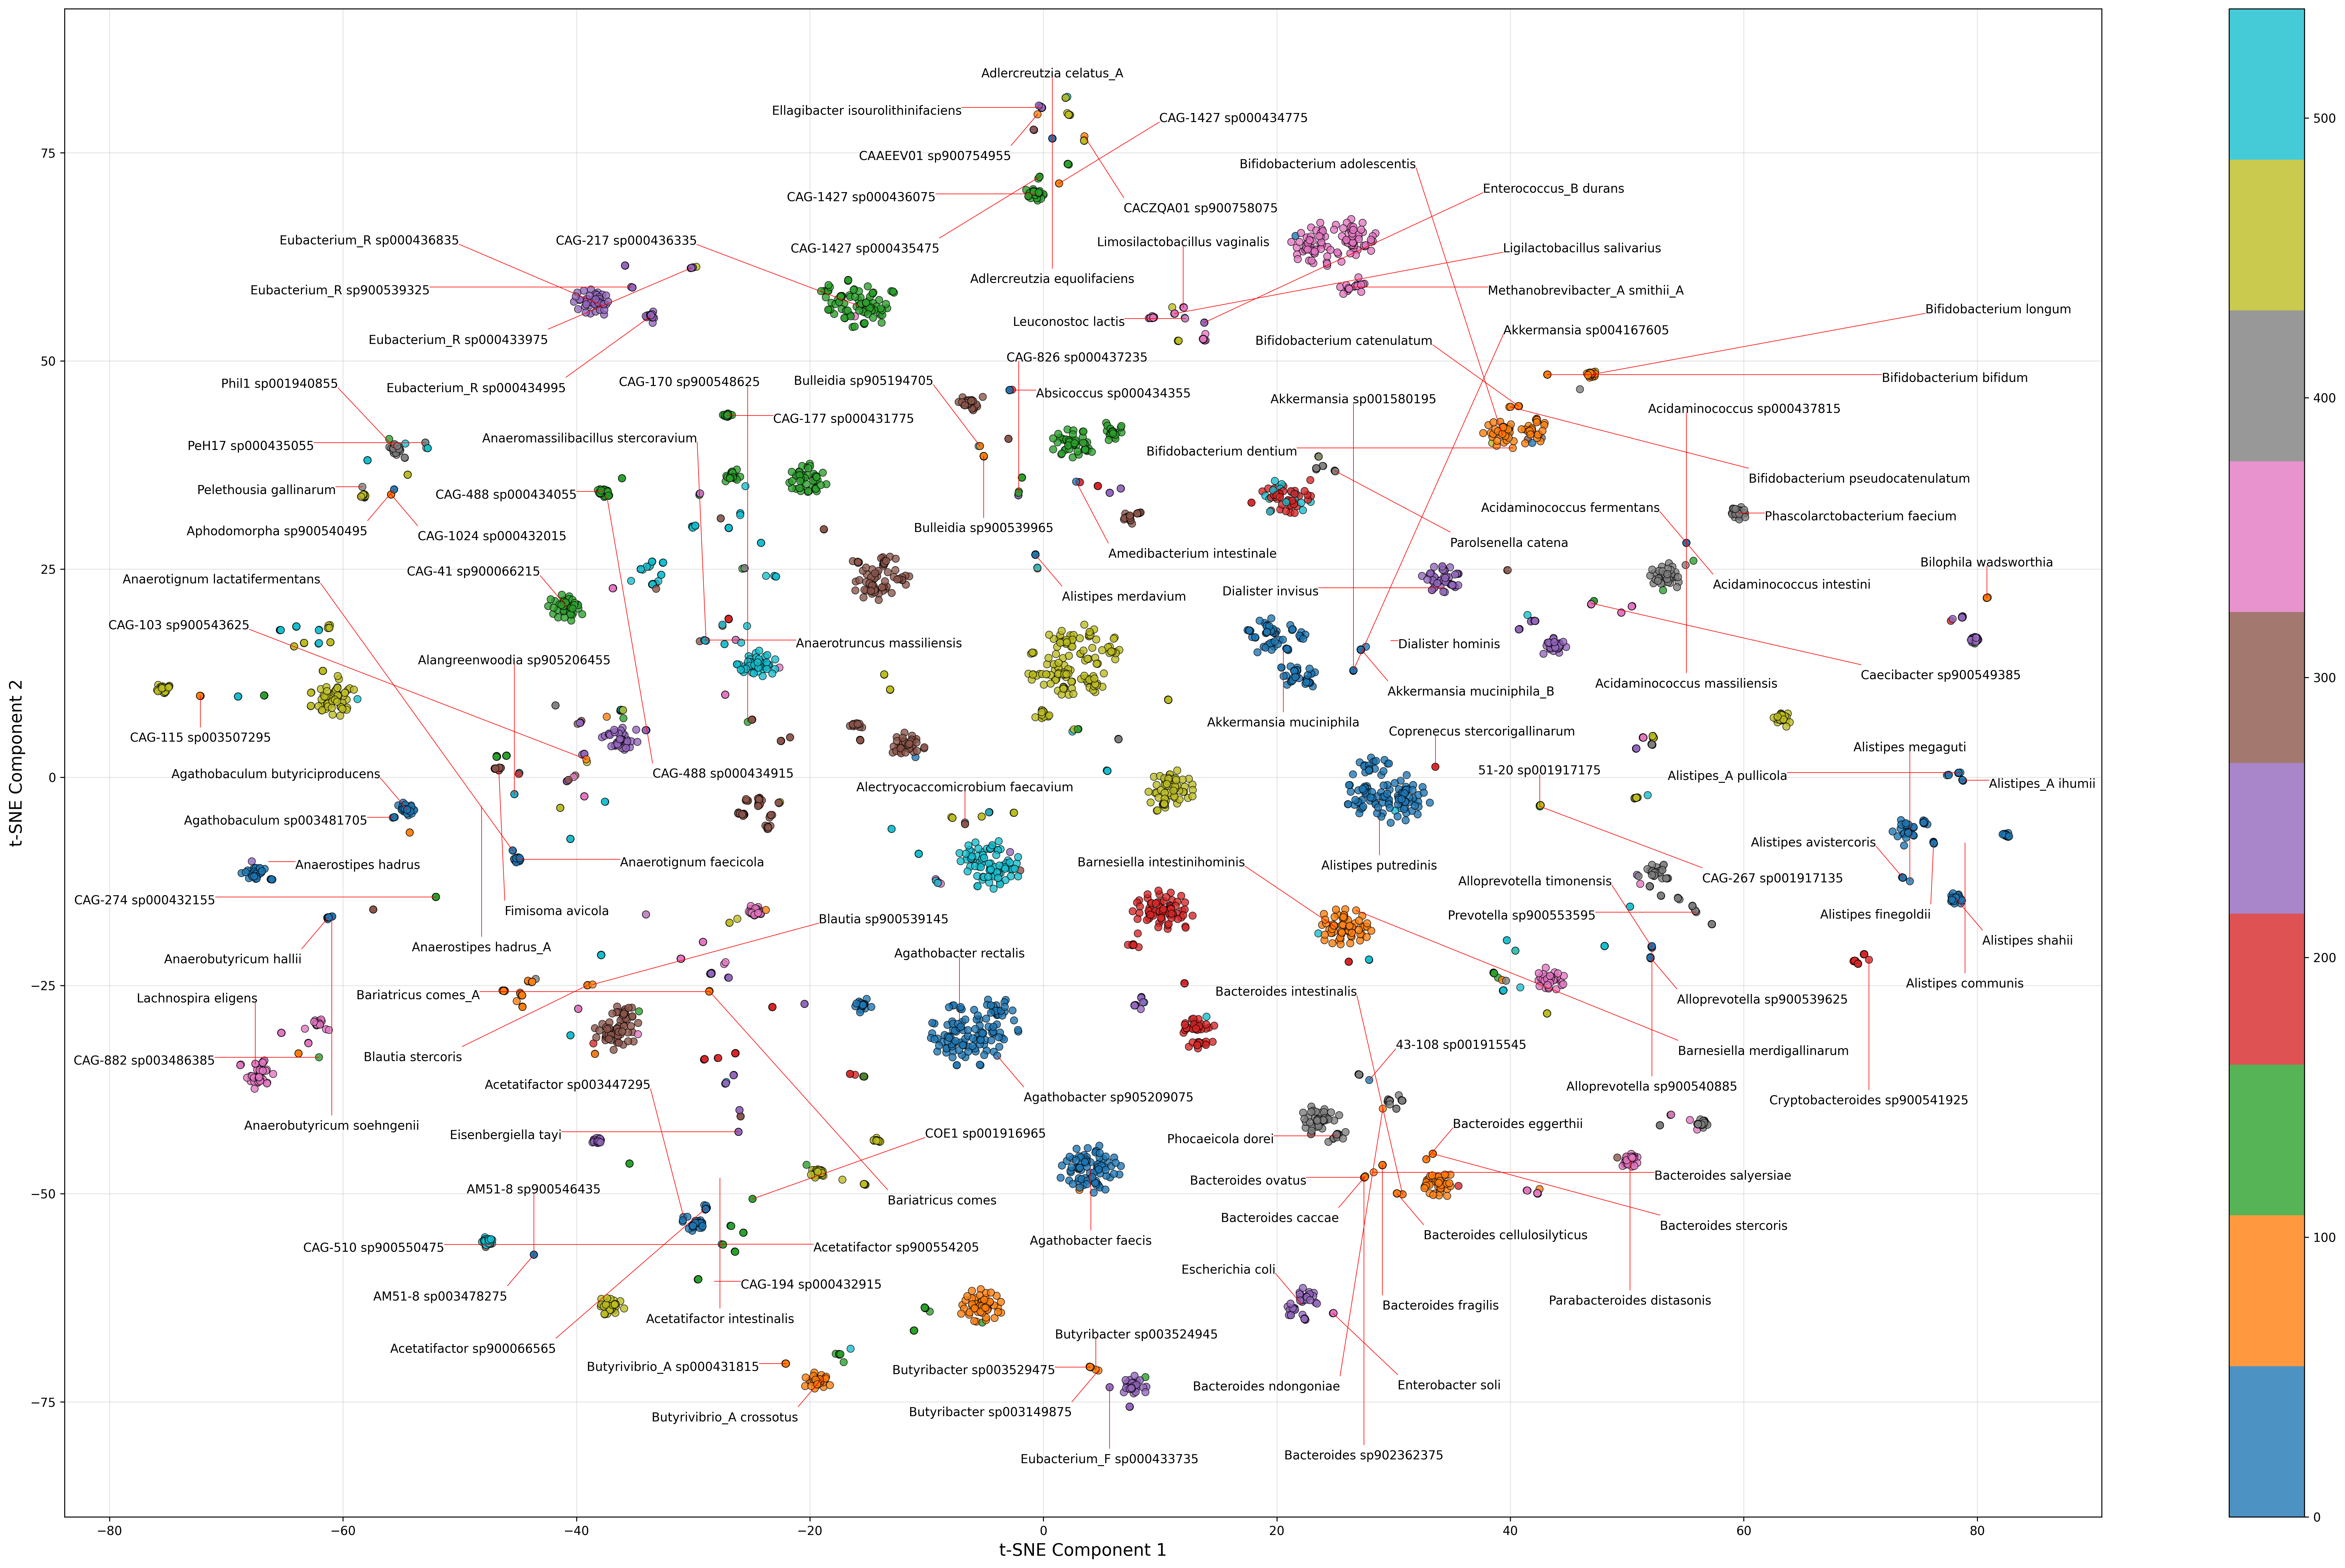

In [92]:
# Create figure and axes with desired size upfront
fig, ax = plt.subplots(figsize=(30, 18), dpi=300)

# Generate scatter plot and assign to variable for colorbar
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=class_labels, cmap='tab10', 
                     alpha=0.8, edgecolor='k', linewidth=0.5)

# Calculate centroids for each species
centroids = []
species_labels = []
for i, species in enumerate(encoder.classes_):
    mask = (class_labels == i)
    if np.sum(mask) > 0:  # Ensure there are samples for this class
        centroid = np.mean(X_tsne[mask], axis=0)
        centroids.append(centroid)
        species_labels.append(species)

centroids = np.array(centroids)

# Allocate text labels in one go
ta.allocate(ax,
            x=centroids[:, 0],  # X coordinates of centroids
            y=centroids[:, 1],  # Y coordinates of centroids
            text_list=species_labels,
            x_scatter=X_tsne[:, 0],  # For collision detection
            y_scatter=X_tsne[:, 1],
            textsize=10,
            draw_lines=True,
            linewidth=0.5,
            draw_all=False,
            avoid_label_lines_overlap=True)

# Add colorbar using the scatter plot reference
cbar = plt.colorbar(scatter, ax=ax)
#cbar.set_ticklabels(encoder.classes_)
#cbar.set_label('Species')

# Add titles and labels
#ax.set_title('t-SNE Visualizatio', fontsize=16)
ax.set_xlabel('t-SNE Component 1', fontsize=14)
ax.set_ylabel('t-SNE Component 2', fontsize=14)
ax.grid(alpha=0.3)


plt.tight_layout()
plt.savefig("./figures/fig8.png", dpi=300)
plt.show()

In [94]:
from sklearn.manifold import trustworthiness
trust = trustworthiness(X_tsne_binary, X_tsne, n_neighbors=12)
print(f"Trustworthiness: {trust}")

Trustworthiness: 0.9980679328252338


# Longitudal A.onderdonkii

In [98]:
X_binary_df = pd.DataFrame(X_binary, columns=X_taxa.index, index=X_taxa.columns)
X_binary_df 

enzyme                 K00003  K00004  K00005  K00007  K00008  K00009  K00010  \
V350181262_110_3            1       0       0       0       0       1       0   
V350181321_126_25           1       0       0       0       0       1       0   
V350181262_98_46            1       0       0       0       0       1       0   
V350181201_31_45            1       0       0       0       0       0       0   
V350181262_108_1            1       0       0       0       0       1       0   
V350181262_107_4            1       0       0       0       0       1       0   
V350181323_32_0             1       0       0       0       0       1       0   
V350166995_57_4             1       0       0       0       0       1       0   
V350174473_26_1             1       0       0       0       0       1       0   
V350166995_72_48            1       0       0       0       0       1       0   
V350181201_44_2             1       0       0       0       0       1       0   
V350181262_117_2            1       0       0       0       0       1       0   
V350166995_86_77            1       0       0       0       0       1       0   
V350181262_99_39            1       0       0       0       0       1       0   
V350181321_113_0            1       0       0       0       0       1       0   
V350181323_162_0            1       0       0       0       0       1       0   
V350181262_140_9            1       0       0       0       0       1       0   
V350181262_150_0            1       0       0       0       0       1       0   
V350181262_149_1            1       0       0       0       0       1       0   
V350174473_37_s114          1       0       0       0       0       1       0   
V350174473_52_s35           1       0       0       0       0       1       0   
V350181262_158_8            1       0       0       0       0       0       0   
V350181262_160_0            1       0       0       0       0       1       0   
V350174473_72_s72_sub       1       0       0       0       0       1       0   
V350166995_163_s27          1       0       0       0       0       1       0   
V350181323_51_s95           1       0       0       0       0       1       0   
V350166995_169_4            1       0       0       0       0       1       0   
V350181321_139_33           1       0       0       0       0       1       0   
V350181201_19_1             1       0       0       0       0       1       0   
V350181262_130_7            1       0       0       0       0       1       0   
V350181323_49_5             1       0       0       0       0       1       0   
V350181321_132_0            1       0       0       0       0       1       0   
V350166995_166_s87          1       0       0       0       0       1       0   
V350166995_168_s28          1       0       0       0       0       1       0   
V350181262_145_2            1       0       0       0       0       1       0   
V350174473_42_s57           1       0       0       0       0       1       0   
V350181262_142_6            1       0       0       0       0       1       0   
V350181323_34_8             1       0       0       0       0       1       0   
V350174473_66_s56           1       0       0       0       0       1       0   
V350166995_164_1            1       0       0       0       0       1       0   
V350181262_134_29           1       0       0       0       0       1       0   

enzyme                 K00012  K00013  K00014  ...  K24658  K24659  K24689  \
V350181262_110_3            1       1       0  ...       0       0       0   
V350181321_126_25           1       0       0  ...       0       0       0   
V350181262_98_46            1       1       0  ...       0       0       0   
V350181201_31_45            1       1       0  ...       0       0       0   
V350181262_108_1            1       1       0  ...       0       0       0   
V350181262_107_4            1       1       0  ...       0       0       0   
V350181323_32_0             1       1       0  ... 

In [99]:
meta_taxa = merged_df[(merged_df['Species'] == 'Alistipes onderdonkii') ]

In [100]:
merged_df_taxa = meta_taxa[['ID_KYH','YEAR']].join(X_binary_df, how='inner')
merged_df_taxa

ID_KYH  YEAR  K00003  K00004  K00005  K00007  K00008  \
V350181262_110_3       1102033  2017       1       0       0       0       0   
V350181321_126_25      1179444  2017       1       0       0       0       0   
V350181262_98_46       1086758  2017       1       0       0       0       0   
V350181201_31_45       1019679  2017       1       0       0       0       0   
V350181262_108_1       1064676  2017       1       0       0       0       0   
V350181262_107_4       1062453  2017       1       0       0       0       0   
V350181323_32_0        1013411  2017       1       0       0       0       0   
V350166995_57_4        1160586  2017       1       0       0       0       0   
V350174473_26_1        1029798  2017       1       0       0       0       0   
V350166995_72_48       1057900  2017       1       0       0       0       0   
V350181201_44_2        1185032  2017       1       0       0       0       0   
V350181262_117_2       1060209  2017       1       0       0       0       0   
V350166995_86_77       1180062  2017       1       0       0       0       0   
V350181262_99_39       1161212  2017       1       0       0       0       0   
V350181321_113_0       1086114  2017       1       0       0       0       0   
V350181323_162_0       1144129  2017       1       0       0       0       0   
V350181262_140_9       1064676  2022       1       0       0       0       0   
V350181262_150_0       1079635  2022       1       0       0       0       0   
V350181262_149_1       1060209  2022       1       0       0       0       0   
V350174473_37_s114     1006407  2022       1       0       0       0       0   
V350174473_52_s35      1050262  2022       1       0       0       0       0   
V350181262_158_8       1051154  2022       1       0       0       0       0   
V350181262_160_0       1112948  2022       1       0       0       0       0   
V350174473_72_s72_sub  1062453  2022       1       0       0       0       0   
V350166995_163_s27     1154380  2022       1       0       0       0       0   
V350181323_51_s95      1164738  2022       1       0       0       0       0   
V350166995_169_4       1160586  2022       1       0       0       0       0   
V350181321_139_33      1069587  2022       1       0       0       0       0   
V350181201_19_1        1185032  2022       1       0       0       0       0   
V350181262_130_7       1086758  2022       1       0       0       0       0   
V350181323_49_5        1147204  2022       1       0       0       0       0   
V350181321_132_0       1179444  2022       1       0       0       0       0   
V350166995_166_s87     1168864  2022       1       0       0       0       0   
V350166995_168_s28     1057900  2022       1       0       0       0       0   
V350181262_145_2       1134556  2022       1       0       0       0       0   
V350174473_42_s57      1094555  2022       1       0       0       0       0   
V350181262_142_6       1102033  2022       1       0       0       0       0   
V350181323_34_8        1152946  2022       1       0       0       0       0   
V350174473_66_s56      1050047  2022       1       0       0       0       0   
V350166995_164_1       1151771  2022       1       0       0       0       0   
V350181262_134_29      1128065  2022       1       0       0       0       0   

                       K00009  K00010  K00012  ...  K24658  K24659  K24689  \
V350181262_110_3            1       0       1  ...       0       0       0   
V350181321_126_25           1       0       1  ...       0       0       0   
V350181262_98_46            1       0       1  ...       0       0       0   
V350181201_31_45            0       0       1  ...       0       0       0   
V350181262_108_1            1       0       1  ...       0       0       0   
V350181262_107_4            1       0       1  ...       0       0       0   
V350181323_32_0             1       0       1  ...       0       0       0   
V350166995_57_4             1       0  

In [101]:
duplicate_ids = merged_df_taxa[merged_df_taxa.duplicated(subset='ID_KYH', keep=False)]

print(duplicate_ids)
grouped = merged_df_taxa.groupby('ID_KYH').filter(lambda x: len(x) > 1)

print(grouped)

                        ID_KYH  YEAR  K00003  K00004  K00005  K00007  K00008  \
V350181262_110_3       1102033  2017       1       0       0       0       0   
V350181321_126_25      1179444  2017       1       0       0       0       0   
V350181262_98_46       1086758  2017       1       0       0       0       0   
V350181262_108_1       1064676  2017       1       0       0       0       0   
V350181262_107_4       1062453  2017       1       0       0       0       0   
V350166995_57_4        1160586  2017       1       0       0       0       0   
V350166995_72_48       1057900  2017       1       0       0       0       0   
V350181201_44_2        1185032  2017       1       0       0       0       0   
V350181262_117_2       1060209  2017       1       0       0       0       0   
V350181262_140_9       1064676  2022       1       0       0       0       0   
V350181262_149_1       1060209  2022       1       0       0       0       0   
V350174473_72_s72_sub  1062453  2022    

In [102]:
import pandas as pd

def find_differences_with_year(df):
    """
    Finds differing columns for each pair of rows with the same ID_KYH in the DataFrame,
    displaying the values of these columns for each year.

    Args:
        df: Pandas DataFrame with columns 'ID_KYH', 'YEAR', and others.

    Returns:
        Pandas DataFrame with ID_KYH and information about differing columns and values by year.
    """
    unique_ids = df['ID_KYH'].unique()
    results = []

    for id_kyh in unique_ids:
        subset = df[df['ID_KYH'] == id_kyh].sort_values(by='YEAR')  # Important: Sort by YEAR
        if len(subset) == 2:
            year1 = subset['YEAR'].iloc[0]
            year2 = subset['YEAR'].iloc[1]
            diff_cols_info = {}  # Dictionary to store information about differing columns and values

            for col in subset.columns:
                if col not in ['ID_KYH', 'YEAR']:  # Exclude ID_KYH and YEAR from comparison
                    val1 = subset[col].iloc[0]
                    val2 = subset[col].iloc[1]
                    if val1 != val2:
                        diff_cols_info[col] = {year1: val1, year2: val2}

            number_of_different_columns = len(diff_cols_info)
            results.append({'ID_KYH': id_kyh,
                            'Differing Columns': diff_cols_info,
                            'Count': number_of_different_columns})

    return pd.DataFrame(results)


In [103]:
differences_df = find_differences_with_year(grouped)
print(differences_df)


    ID_KYH                                  Differing Columns  Count
0  1102033  {'K00571': {2017: 1, 2022: 0}, 'K01153': {2017...     19
1  1179444  {'K00013': {2017: 0, 2022: 1}, 'K00067': {2017...    115
2  1086758  {'K00986': {2017: 1, 2022: 0}, 'K01153': {2017...     24
3  1064676  {'K00024': {2017: 0, 2022: 1}, 'K00052': {2017...     52
4  1062453  {'K00024': {2017: 1, 2022: 0}, 'K00067': {2017...    135
5  1160586  {'K00024': {2017: 0, 2022: 1}, 'K00239': {2017...     16
6  1057900  {'K00013': {2017: 0, 2022: 1}, 'K00067': {2017...     97
7  1185032  {'K00067': {2017: 0, 2022: 1}, 'K00147': {2017...    121
8  1060209  {'K00067': {2017: 0, 2022: 1}, 'K00525': {2017...     76


In [104]:
differences_df = find_differences_with_year(grouped)
print(differences_df)

    ID_KYH                                  Differing Columns  Count
0  1102033  {'K00571': {2017: 1, 2022: 0}, 'K01153': {2017...     19
1  1179444  {'K00013': {2017: 0, 2022: 1}, 'K00067': {2017...    115
2  1086758  {'K00986': {2017: 1, 2022: 0}, 'K01153': {2017...     24
3  1064676  {'K00024': {2017: 0, 2022: 1}, 'K00052': {2017...     52
4  1062453  {'K00024': {2017: 1, 2022: 0}, 'K00067': {2017...    135
5  1160586  {'K00024': {2017: 0, 2022: 1}, 'K00239': {2017...     16
6  1057900  {'K00013': {2017: 0, 2022: 1}, 'K00067': {2017...     97
7  1185032  {'K00067': {2017: 0, 2022: 1}, 'K00147': {2017...    121
8  1060209  {'K00067': {2017: 0, 2022: 1}, 'K00525': {2017...     76


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_heatmap_changes(differences_df):
    """
    Plots a heatmap showing the appearance and disappearance of enzymes,
    where red indicates appearance and blue indicates disappearance.

    Args:
        differences_df: DataFrame returned by the find_differences_with_year function.
    """
    heatmap_data = {}
    for index, row in differences_df.iterrows():
        id_kyh = row['ID_KYH']
        diff_cols = row['Differing Columns']
        heatmap_data[id_kyh] = {}
        for enzyme, year_data in diff_cols.items():
            # Assuming we have 2017 and 2022 years
            year_2017 = year_data.get(2017)
            year_2022 = year_data.get(2022)

            if year_2017 == 0 and year_2022 == 1:
                heatmap_data[id_kyh][enzyme] = "Appeared"  # Appeared
            elif year_2017 == 1 and year_2022 == 0:
                heatmap_data[id_kyh][enzyme] = "Disappeared"  # Disappeared
            else:
                heatmap_data[id_kyh][enzyme] = "No Change"  # For other cases

    heatmap_df = pd.DataFrame(heatmap_data).T  # Transpose

    change_counts = {}
    for enzyme in heatmap_df.columns:
        changes = heatmap_df[enzyme].value_counts()
        total_changes = changes.get("Appeared", 0) + changes.get("Disappeared", 0)
        change_counts[enzyme] = total_changes

    # Filter the DataFrame to only include enzymes that changed in at least 4 samples
    enzymes_to_plot = [enzyme for enzyme, count in change_counts.items() if count >= 4]
    filtered_heatmap_df = heatmap_df[enzymes_to_plot]

    # Replace text values with numerical values for the heatmap
    mapping = {"Appeared": 1, "Disappeared": -1, "No Change": 0}
    numerical_heatmap_df = filtered_heatmap_df.replace(mapping)
    
    numerical_heatmap_df = numerical_heatmap_df.T
    plt.figure(figsize=(12, 8))
    # Create a custom color palette
    cmap = sns.color_palette(["blue", "white", "red"])

    # Plot the heatmap
    sns.heatmap(numerical_heatmap_df, cmap=cmap, linewidths=.5, linecolor="black",
                cbar_kws={'ticks': [-1, 0, 1], 'label': 'Change'})  # Add ticks and label

    plt.ylabel('KO')
    plt.xlabel('ID_KYH')
    plt.title('Heatmap of Enzyme Changes (Red=Appeared, Blue=Disappeared)\n(Only Enzymes with >= 4 Changes)')
    plt.tight_layout()
    plt.show()



/tmp/ipykernel_751721/1954933092.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_heatmap_df = filtered_heatmap_df.replace(mapping)


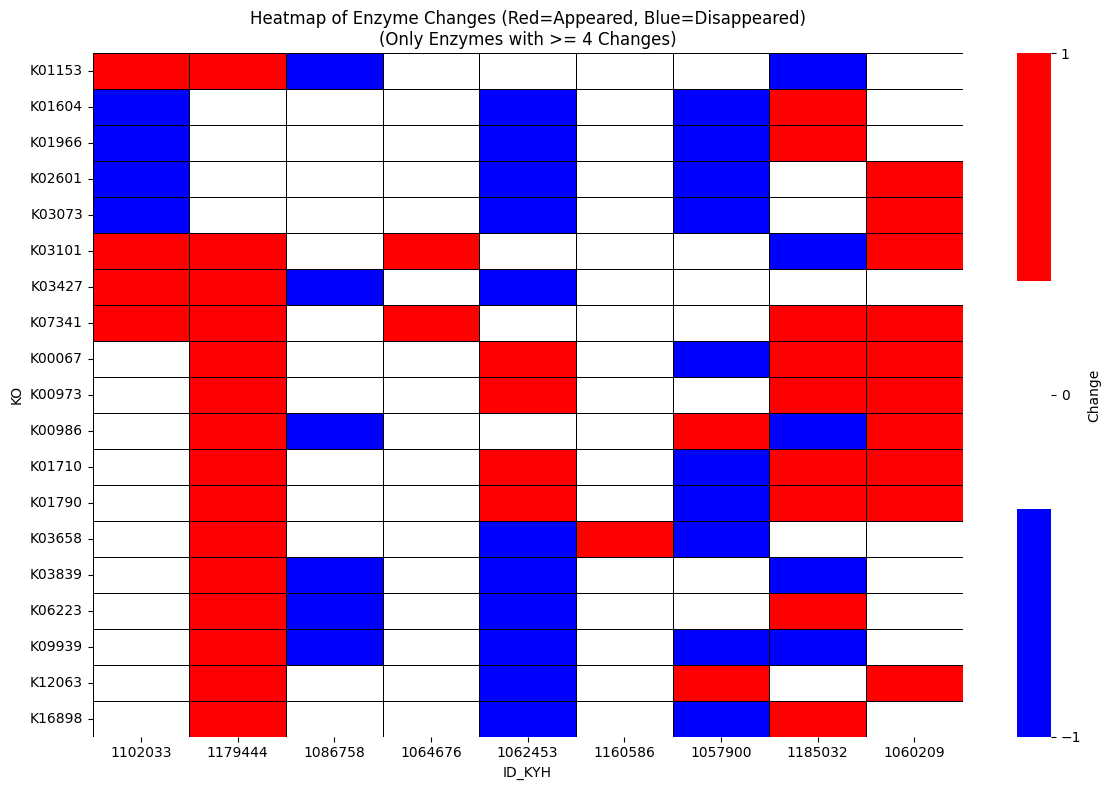

In [108]:
plot_heatmap_changes(differences_df)